In [1]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)

from libs.lib import *
from libs.common import *

g:\My Drive\UII_Project


In [2]:
exps_dir = "../../exps"
if os.path.exists(exps_dir) == False: # tạo thư mục (nếu chưa có)
  os.makedirs(exps_dir, exist_ok=True)

save_dir = f"{exps_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [3]:
data= pd.read_excel('../../data/No Finance Banking.xls')

In [4]:
data

,id,Company,Index,Year,CashRatio,EBIT,EBITDA,GrossProfitMargin,EBITDARatio,EBITRatio,...,CapReturnedtoOwners,BondIssuance,LoanPMT,PmttoFinLeaser,PaidDivid,ReceivedInterest,NetCashChange,CashandEquiBeg,ExcRateFluctuation,CashandEquiEnd
0,A32,Công ty 32,UPCoM,2006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A32,Công ty 32,UPCoM,2007,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A32,Công ty 32,UPCoM,2008,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A32,Công ty 32,UPCoM,2009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A32,Công ty 32,UPCoM,2010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26624,YTC,XNK Y tế TP.HCM,UPCoM,2018,0.08,3.617160e+10,4.021374e+10,0.1744,0.0760,0.0683,...,0.0,1.112255e+12,-1.112546e+12,-301008000.0,-2.509178e+09,0.0,-4.586848e+10,1.017774e+11,0.0,5.590891e+10
26625,YTC,XNK Y tế TP.HCM,UPCoM,2019,0.21,3.319102e+10,3.700330e+10,0.1836,0.0726,0.0651,...,0.0,1.028443e+12,-1.100874e+12,-288640497.0,-7.084000e+09,0.0,8.299045e+10,5.590891e+10,-14871234.0,1.388845e+11
26626,YTC,XNK Y tế TP.HCM,UPCoM,2020,0.03,-1.965803e+10,-1.455882e+10,0.0861,-0.0257,-0.0347,...,0.0,8.601246e+11,-9.099617e+11,-453845964.0,-4.790578e+09,0.0,-1.140651e+11,1.388845e+11,0.0,2.481934e+10
26627,YTC,XNK Y tế TP.HCM,UPCoM,2021,0.02,9.693024e+08,5.319168e+09,0.0868,0.0088,0.0016,...,0.0,5.188647e+11,-5.243035e+11,-453845964.0,0.000000e+00,0.0,-6.547163e+09,2.481934e+10,0.0,1.827217e+10


In [5]:
data.isnull().sum()

id                       0
Company                  0
Index                    0
Year                     0
CashRatio             5902
                      ... 
ReceivedInterest      7255
NetCashChange         7256
CashandEquiBeg        7256
ExcRateFluctuation    7280
CashandEquiEnd        7256
Length: 196, dtype: int64

In [6]:
for i in  data.Company.unique():
    print(i)

Công ty 32
An Phát Bioplastics
Thủy sản Mekong
Tập đoàn Tiên Sơn Thanh Hóa
Việt Tiên Sơn Địa ốc
Truyền thông VMG
Đầu tư Nhãn Hiệu Việt
DV Nông nghiệp Bình Thuận
Thủy sản Bến Tre
Đầu tư và XD Bình Dương ACC
Bê tông An Giang
Gỗ An Cường
Thủy sản CL An Giang
Tập đoàn Khoáng sản Á Cường
Xây lắp Thương mại 2
Cảng Hàng không VN
Mĩ thuật và Truyền thông
Clever Group
Sơn Á Đông
Dệt sợi DAMSAN
Xuất Nhập khẩu Nông sản Thực phẩm An Giang
28.1 JSC
Môi trường Đô thị An Giang
Thủy sản An Giang
Bất động sản An Gia
XNK An Giang
Dược phẩm AGIMEXPHARM
Nông sản Xuất khẩu Sài Gòn
Văn hóa Tân Bình
Xây dựng ALVICO
Khoáng sản Á Châu
FLC Stone
Cơ điện Alphanam
Armephaco
Cơ khí Xây dựng AMECC (Xây dựng LISEMCO 2)
Dược-TB Y tế Việt Mỹ
Rau quả thực phẩm An Giang
Thủy sản Nam Việt
Chiếu xạ An Phú
Nông sản Quảng Ngãi
Tập đoàn An Phát Holdings
Đầu tư Châu Á - Thái Bình Dương
Cơ khí và Thiết bị áp lực - VVMI
Phụ gia và SP Dầu mỏ
Thủy hải sản Sài Gòn
XNK Hàng không
Hàng tiêu dùng ASA
Tập đoàn ASG
Tập đoàn Sao Mai
Dịc

In [7]:
(data=="").sum()

id                    0
Company               0
Index                 0
Year                  0
CashRatio             0
                     ..
ReceivedInterest      0
NetCashChange         0
CashandEquiBeg        0
ExcRateFluctuation    0
CashandEquiEnd        0
Length: 196, dtype: int64

In [8]:
change_category = list((data.select_dtypes('object')).columns)
change_category

['id', 'Company', 'Index']

In [9]:
data[change_category]=data[change_category].astype('category')
data.dtypes

id                    category
Company               category
Index                 category
Year                     int64
CashRatio              float64
                        ...   
ReceivedInterest       float64
NetCashChange          float64
CashandEquiBeg         float64
ExcRateFluctuation     float64
CashandEquiEnd         float64
Length: 196, dtype: object

In [10]:
category_columns=list((data.select_dtypes('category')).columns)
numeric_columns=list((data.select_dtypes('number')).columns)

In [11]:
np.savez(f'{save_dir}/columns_dtype.npz', category_columns = category_columns, numeric_columns = numeric_columns)

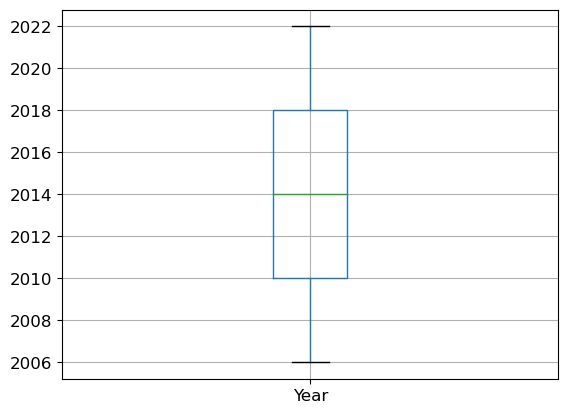

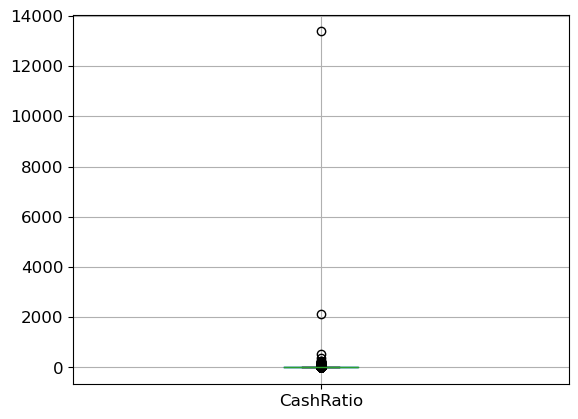

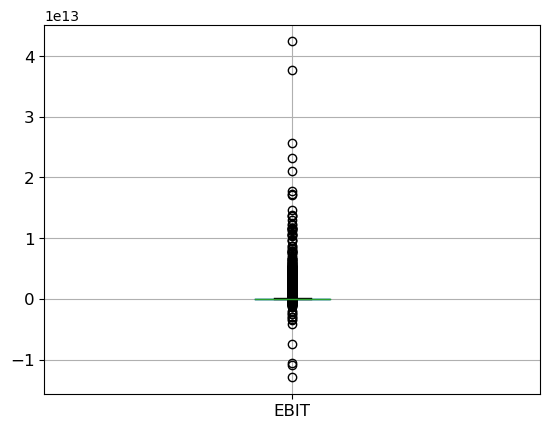

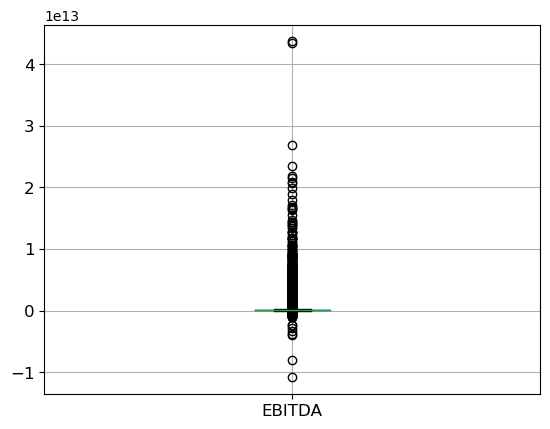

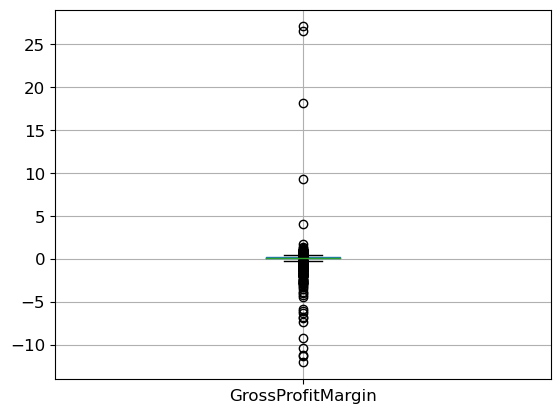

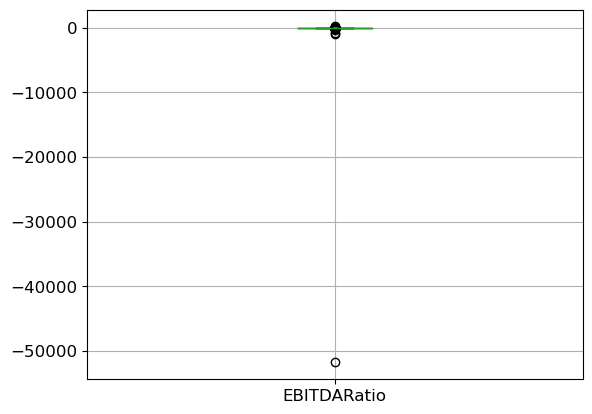

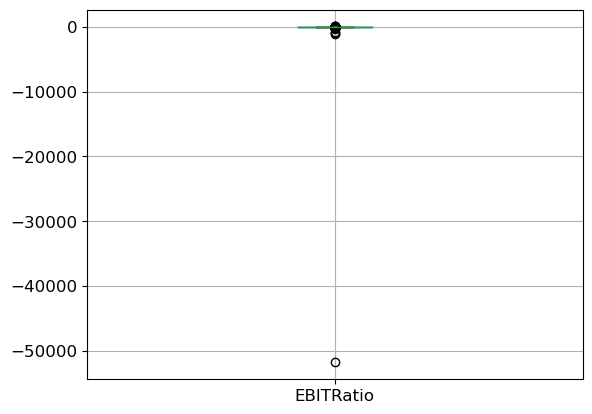

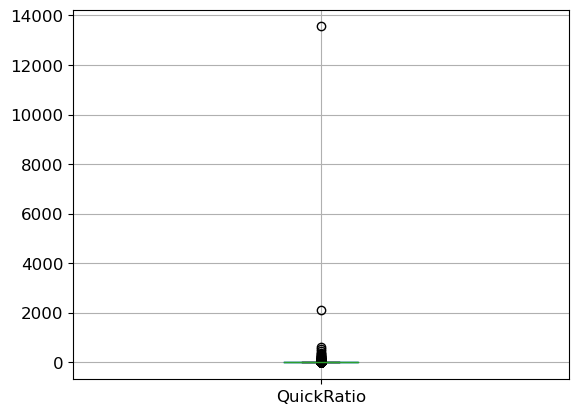

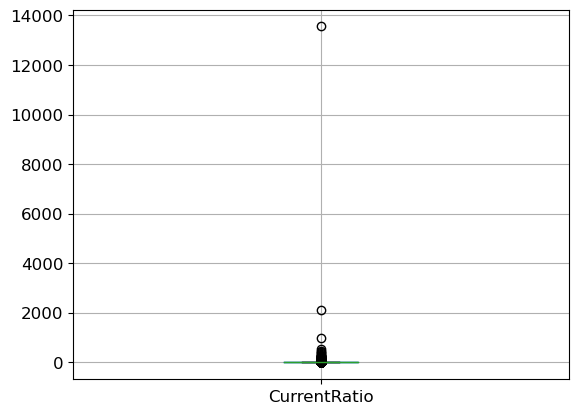

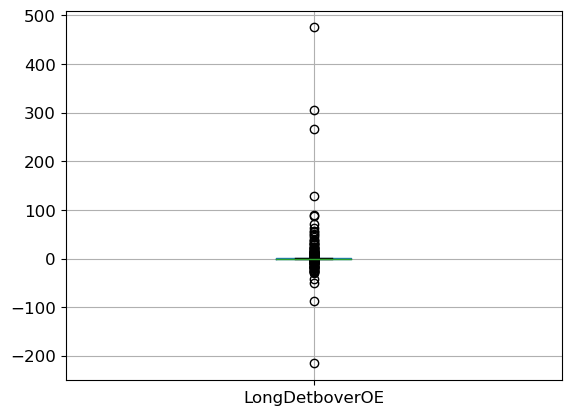

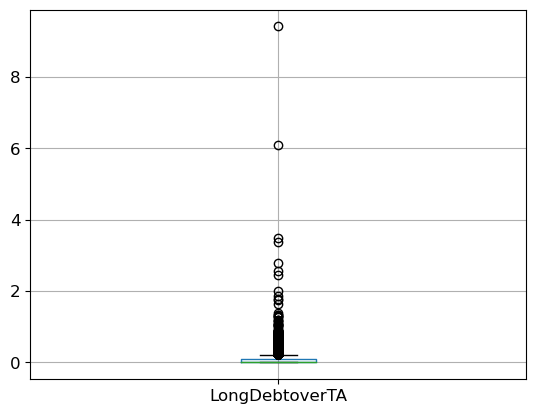

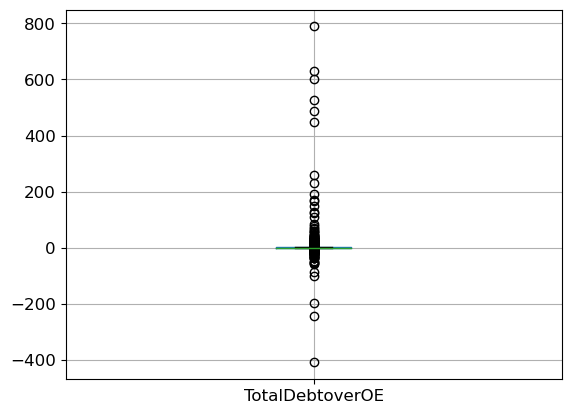

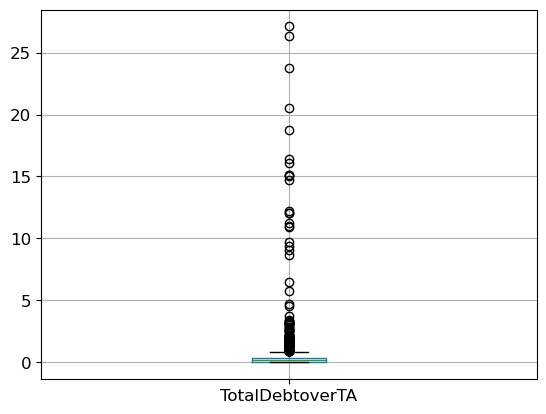

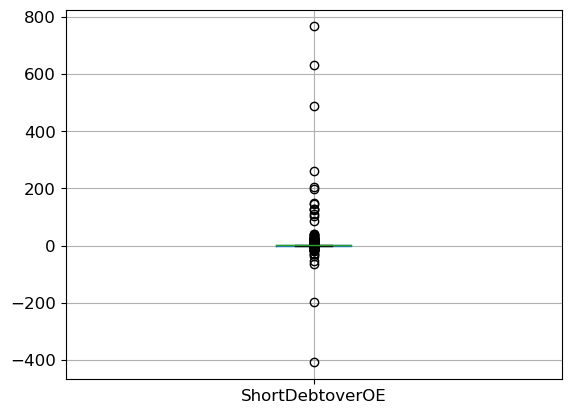

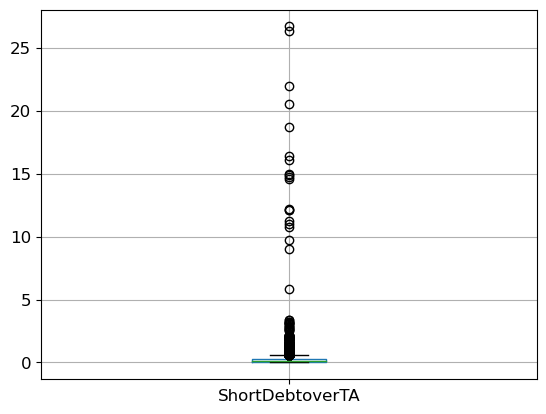

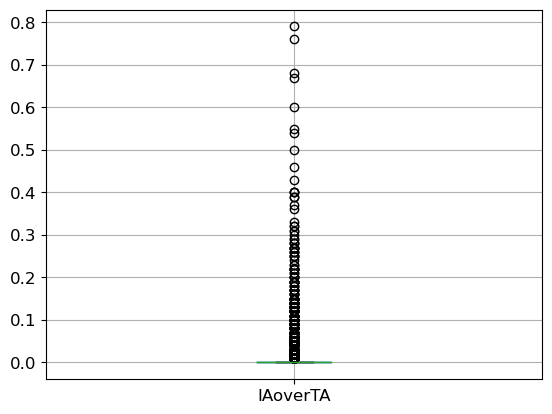

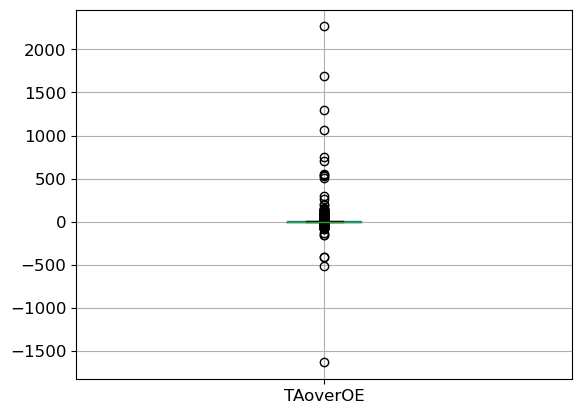

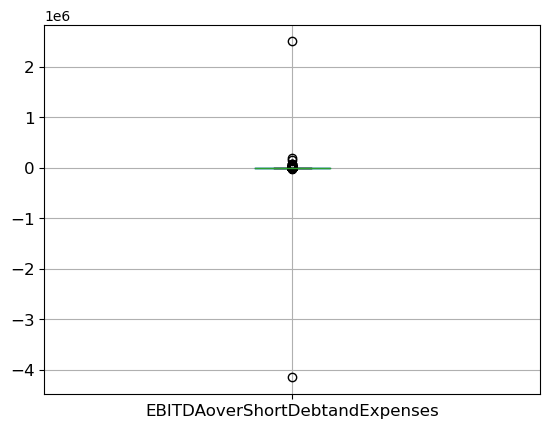

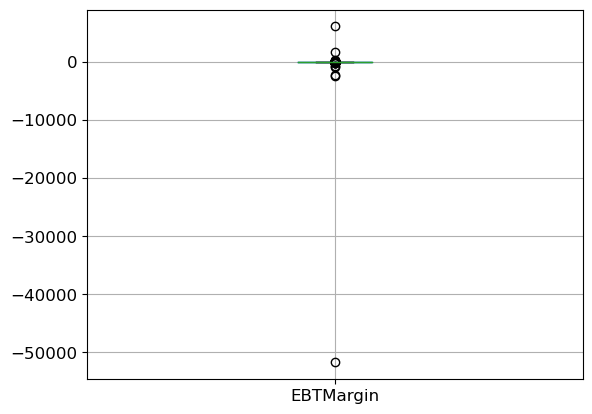

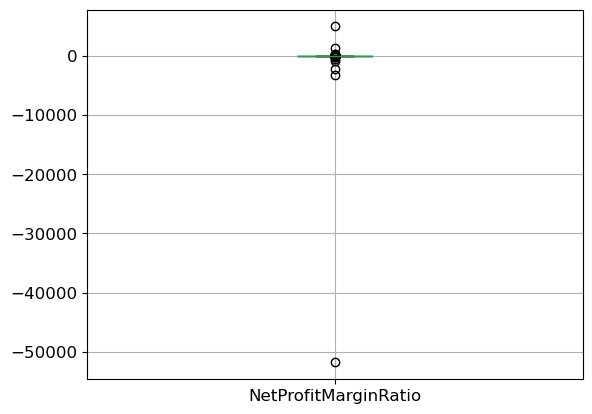

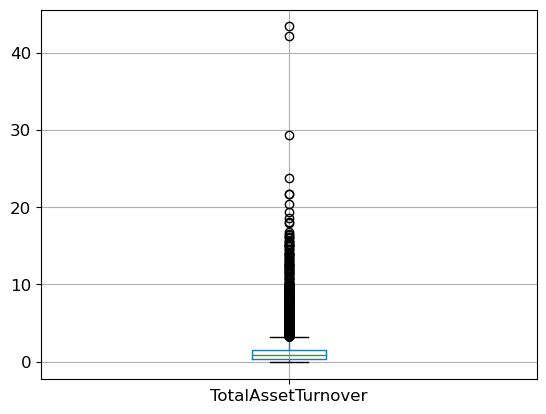

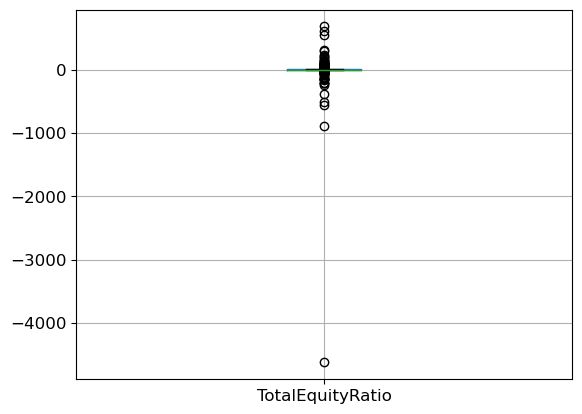

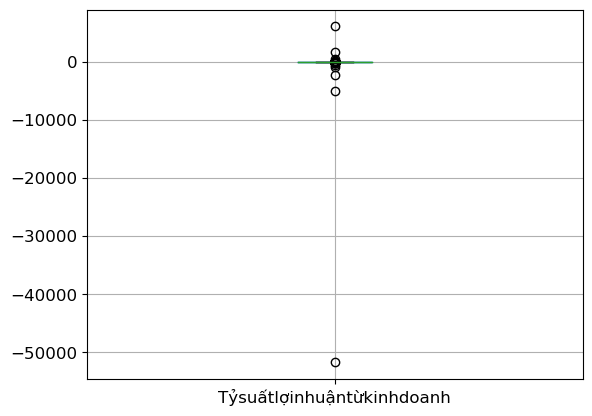

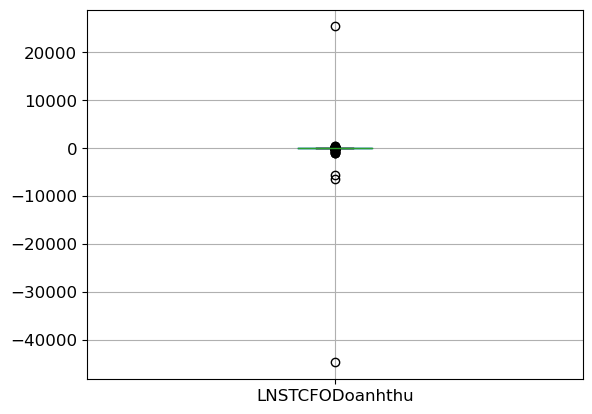

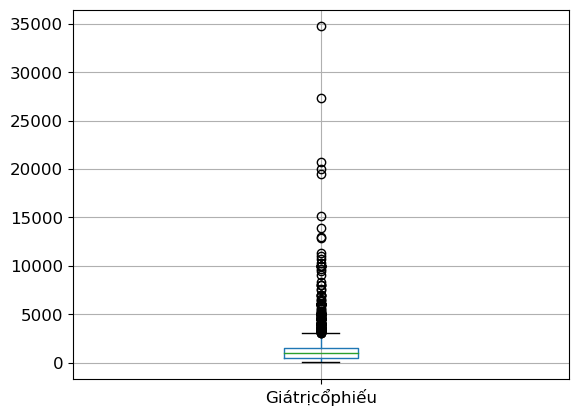

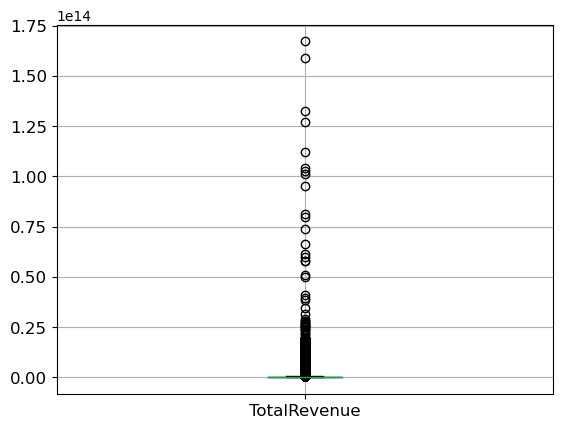

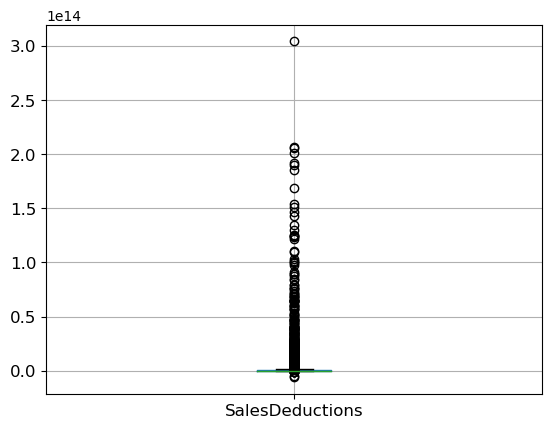

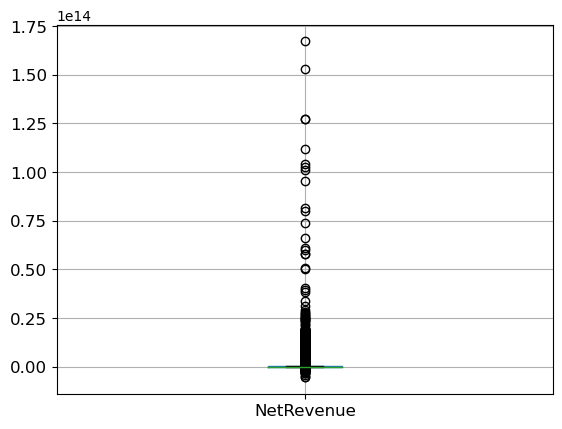

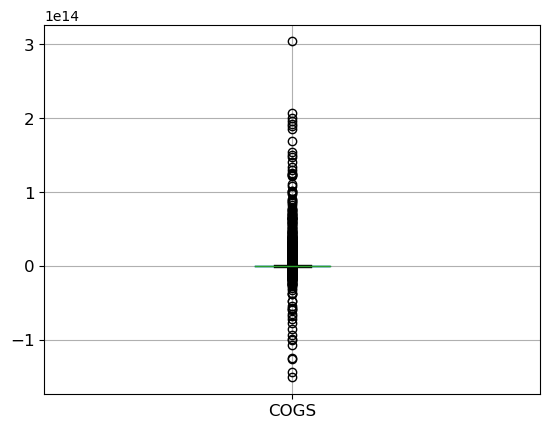

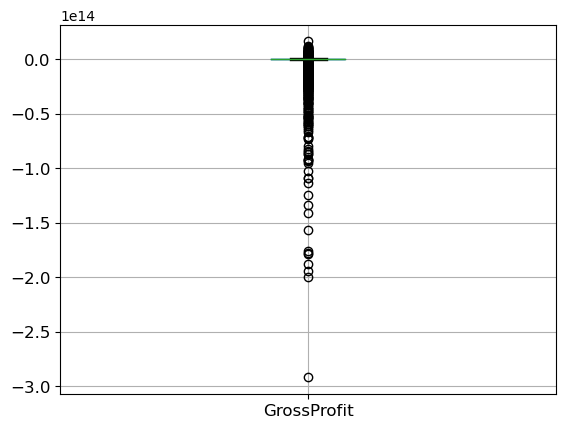

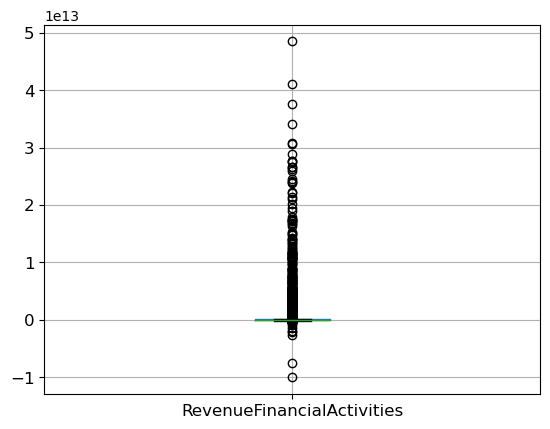

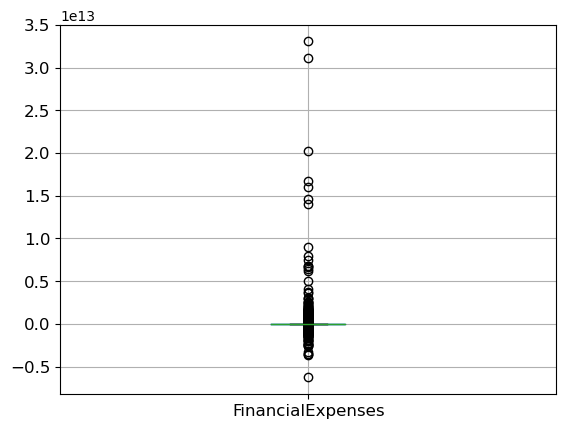

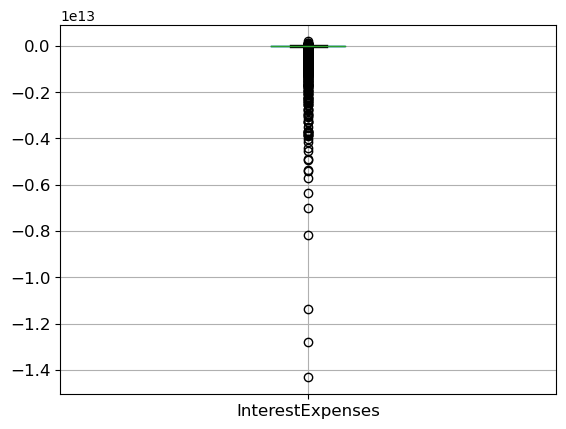

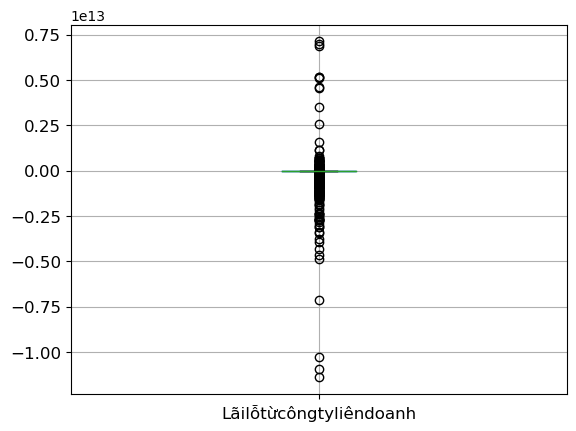

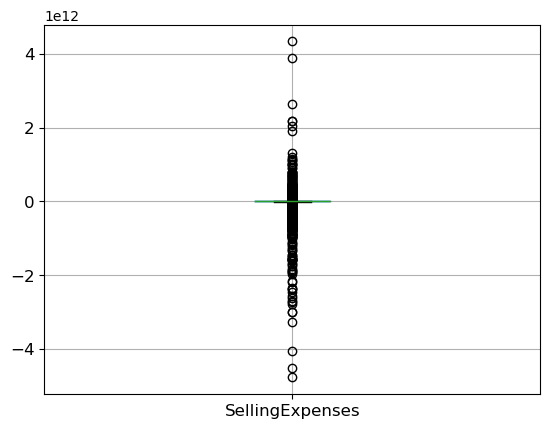

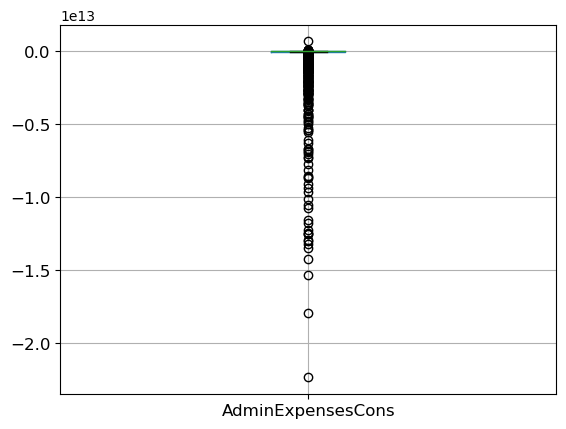

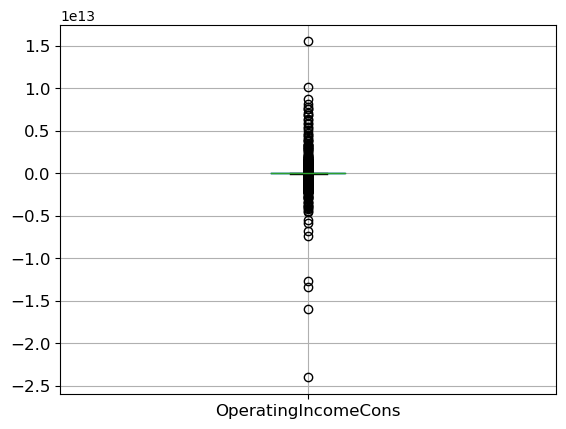

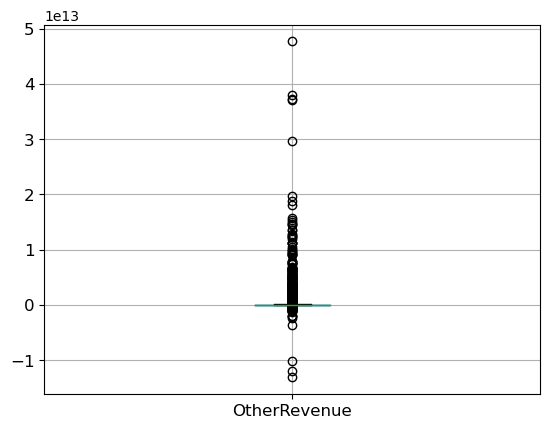

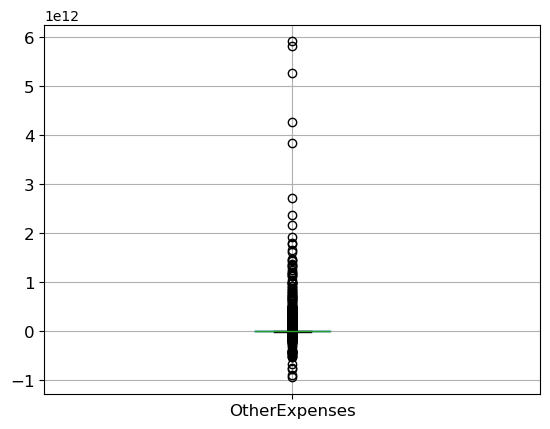

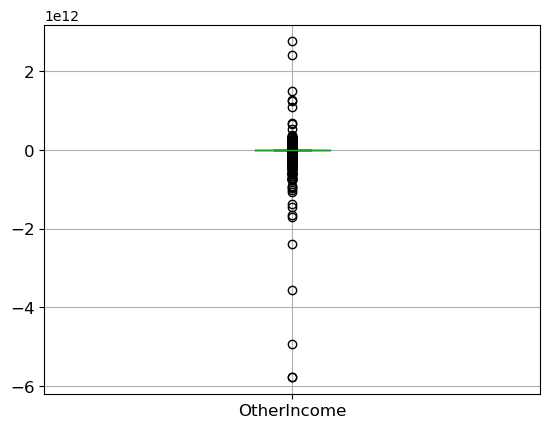

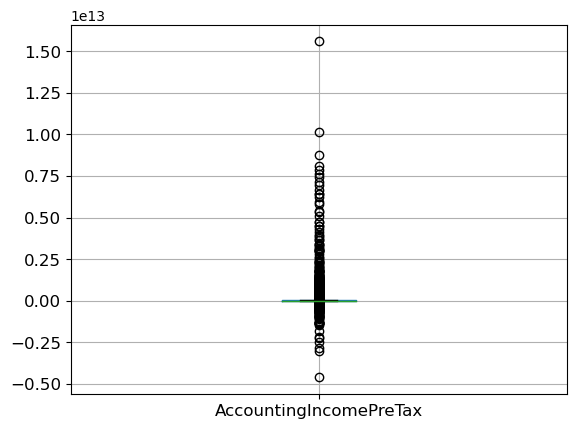

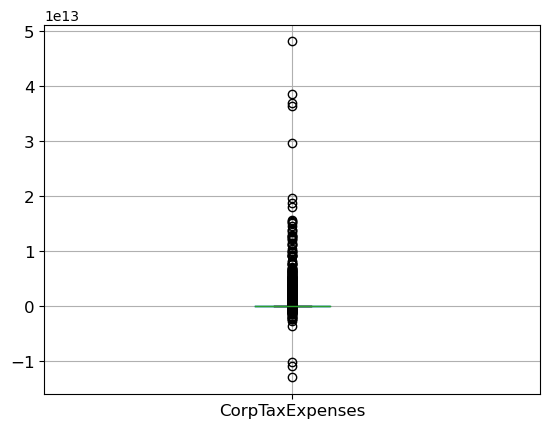

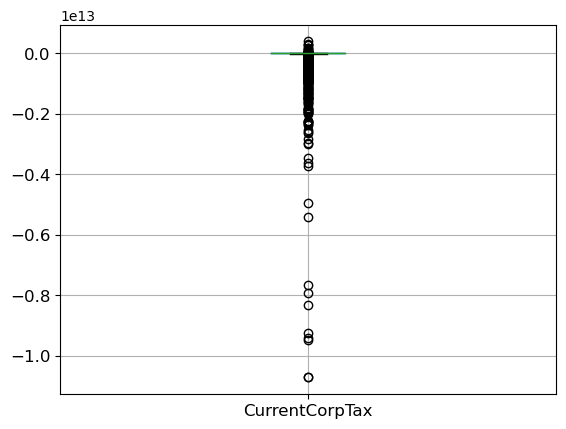

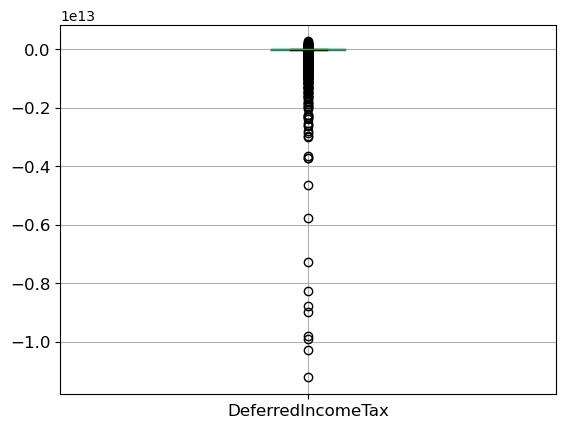

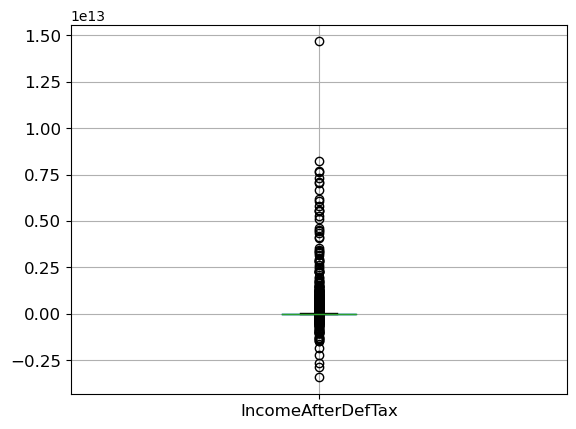

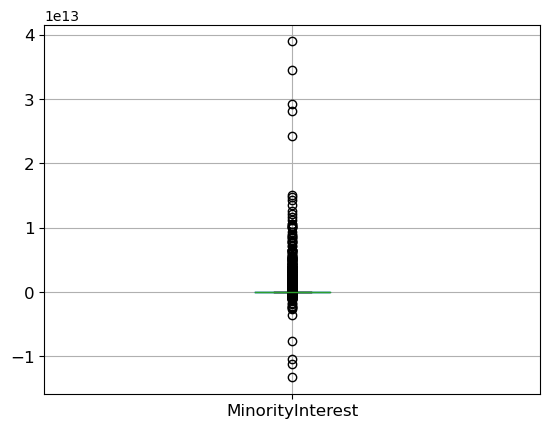

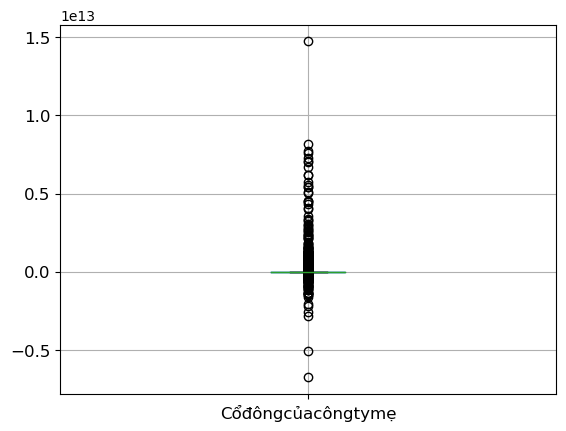

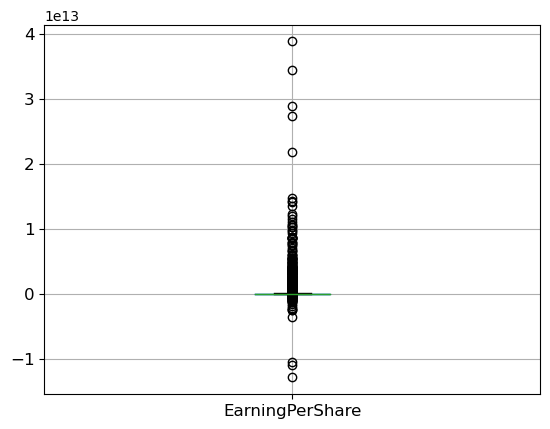

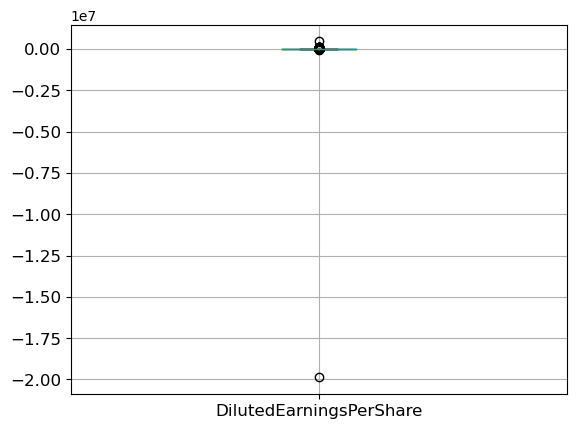

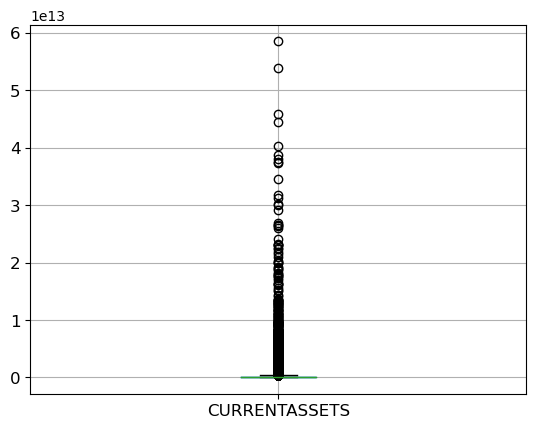

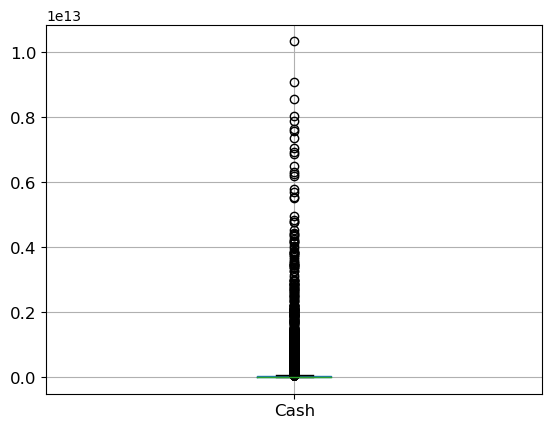

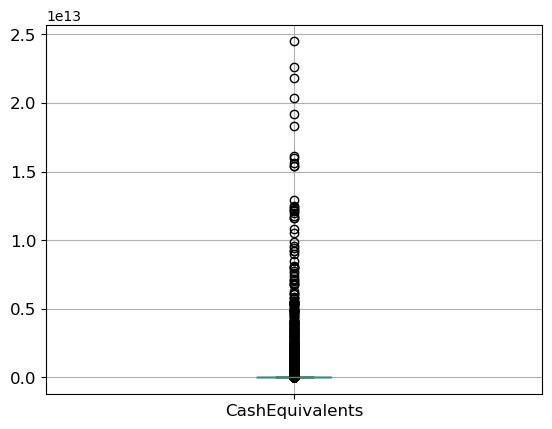

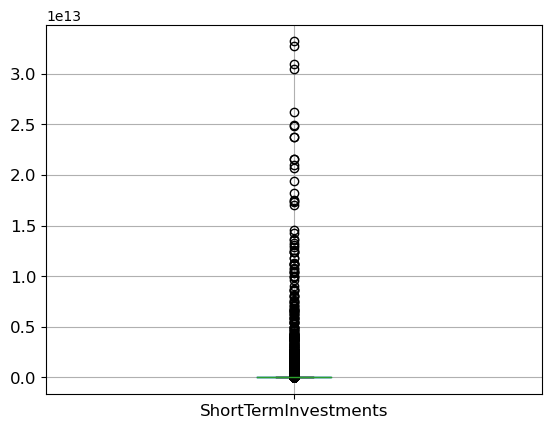

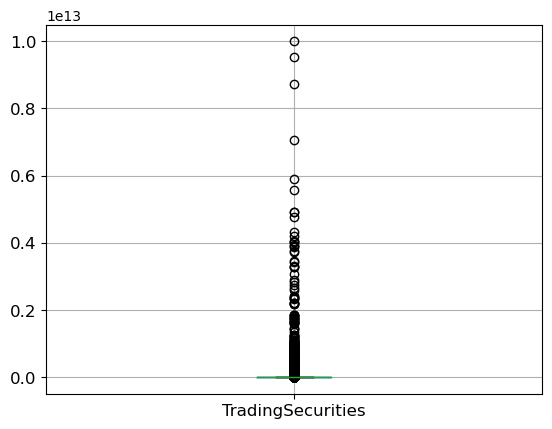

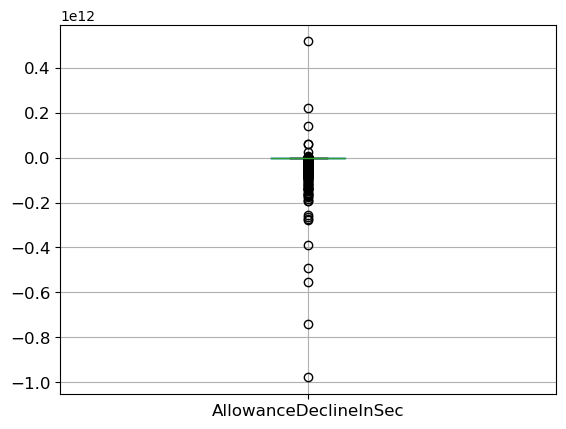

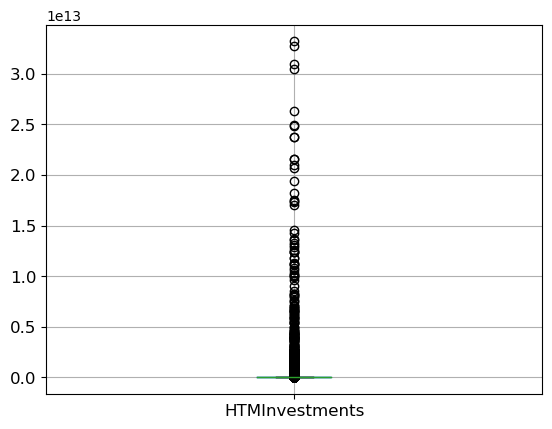

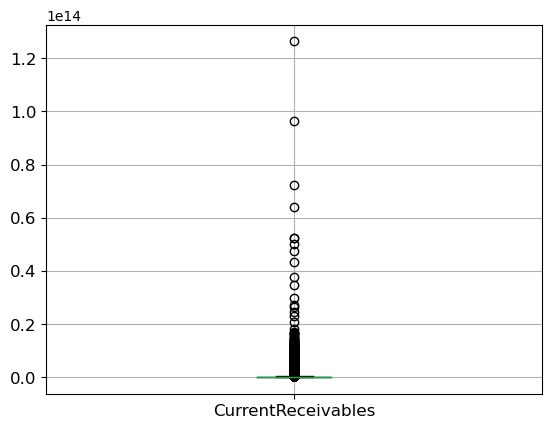

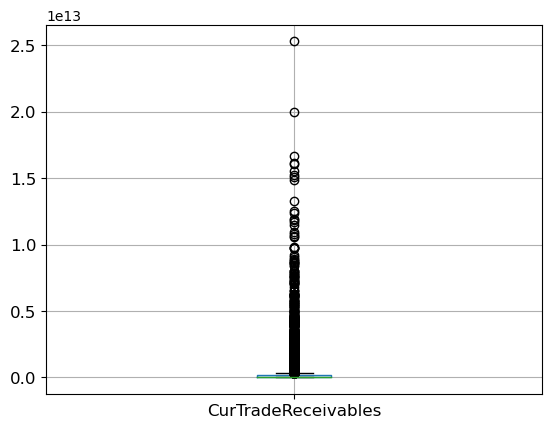

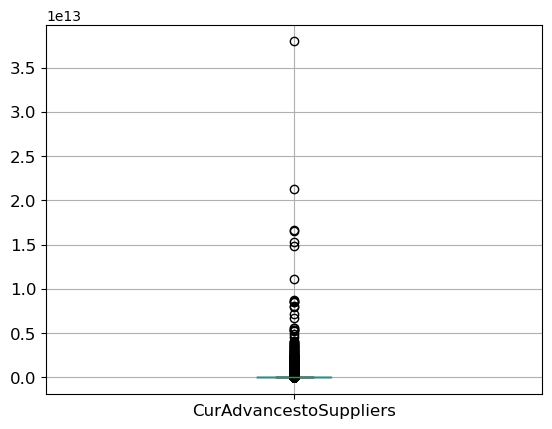

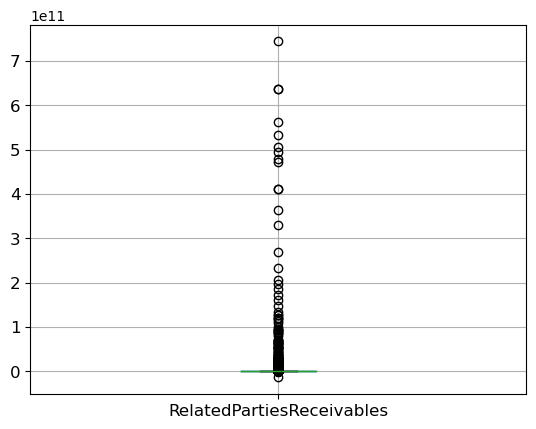

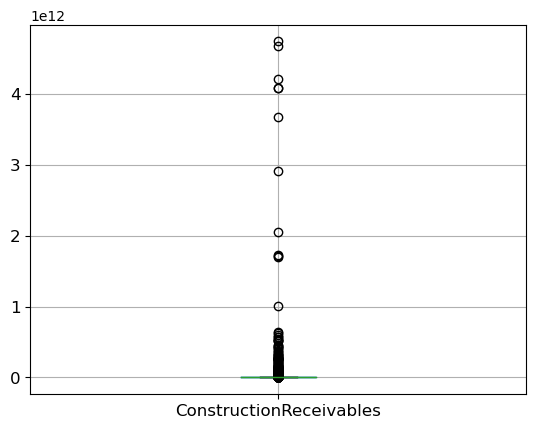

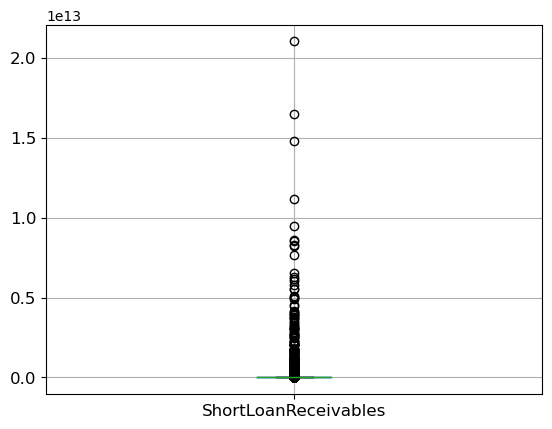

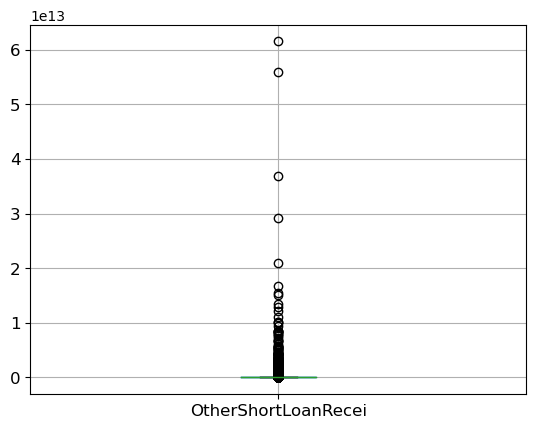

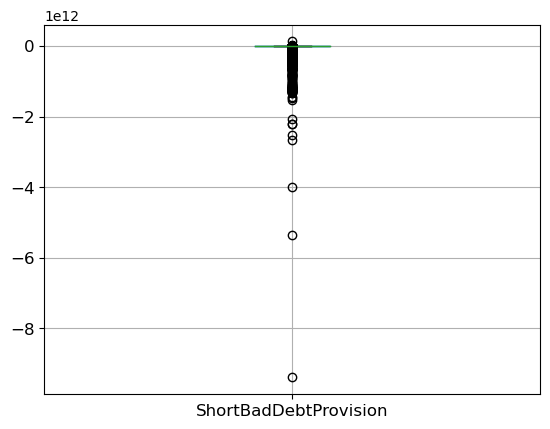

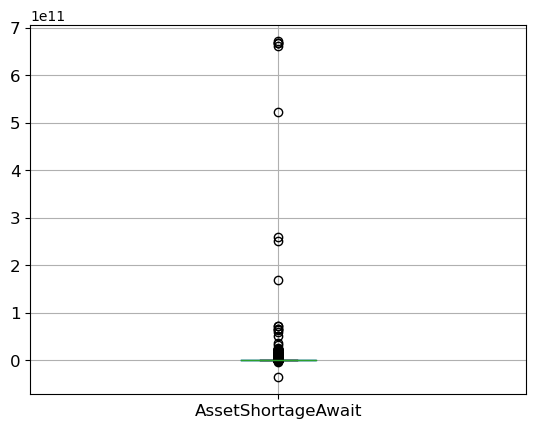

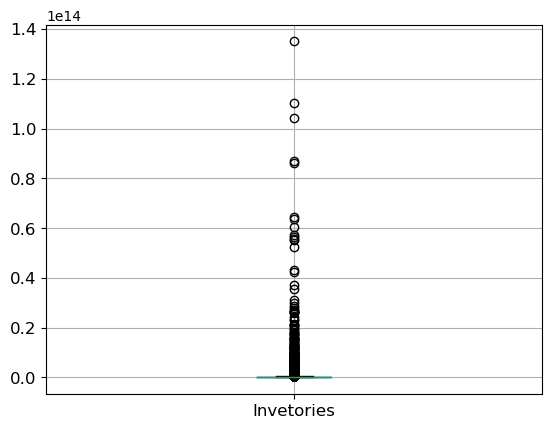

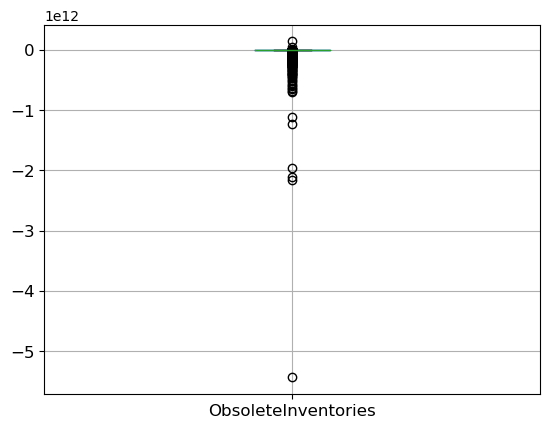

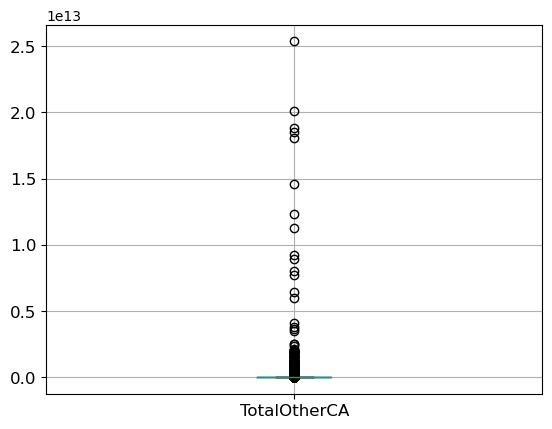

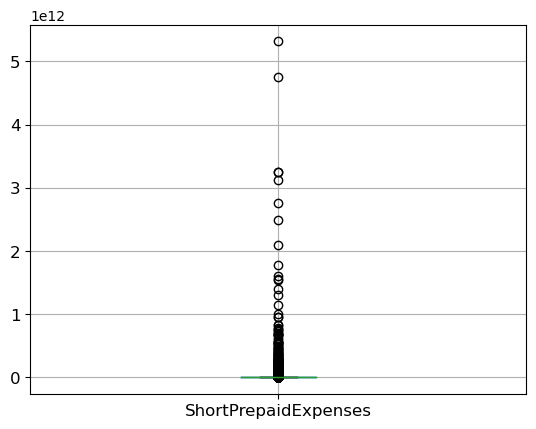

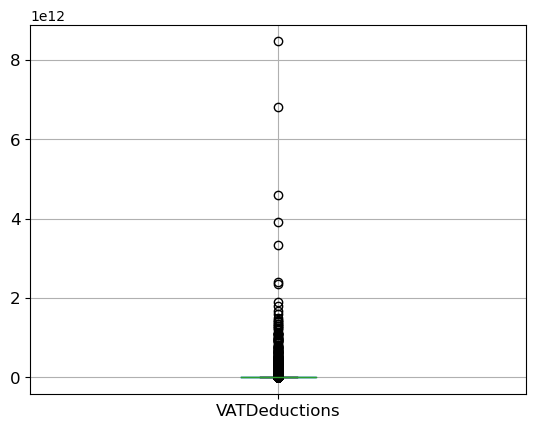

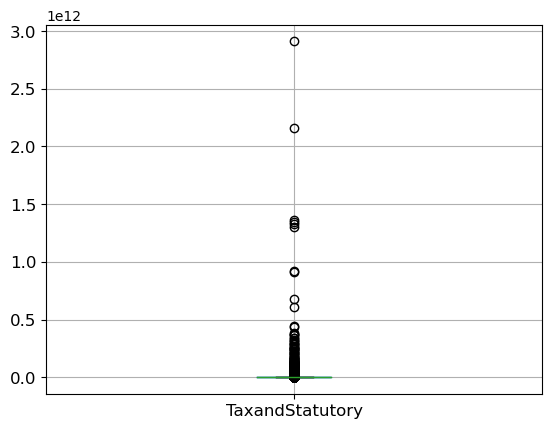

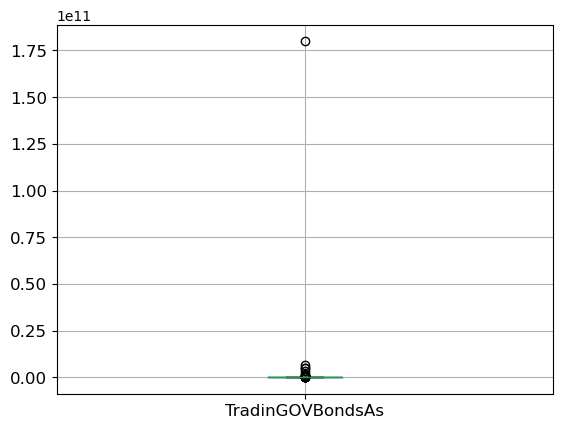

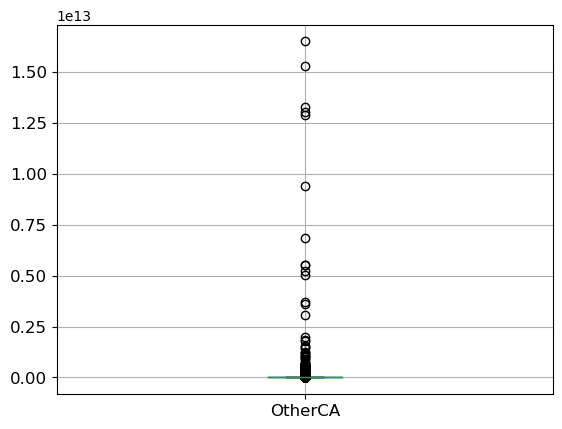

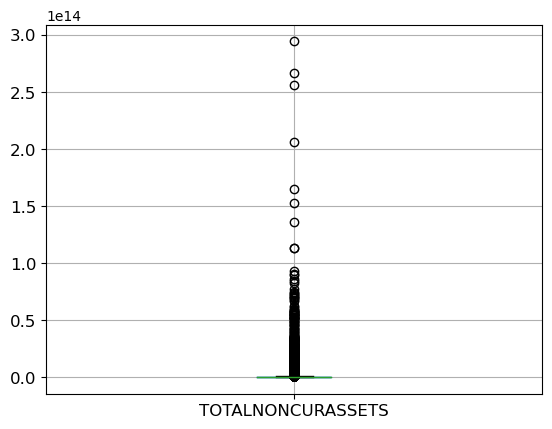

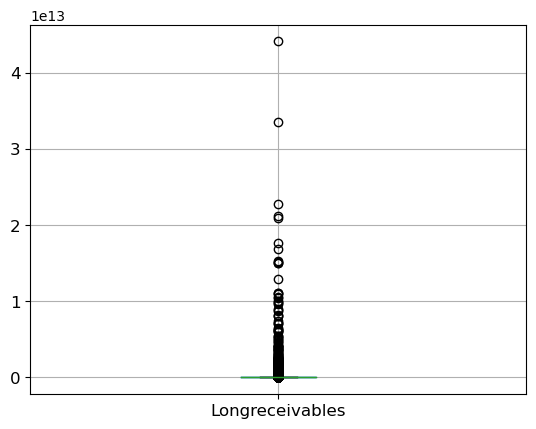

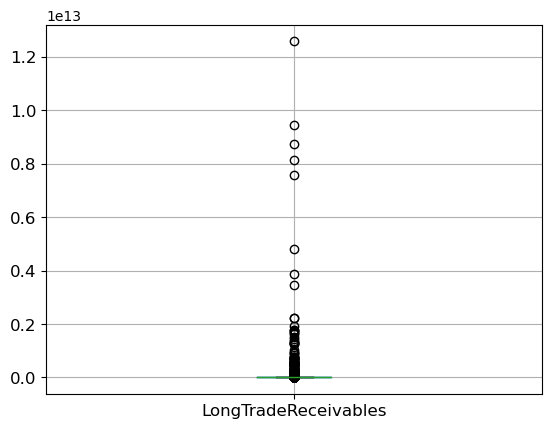

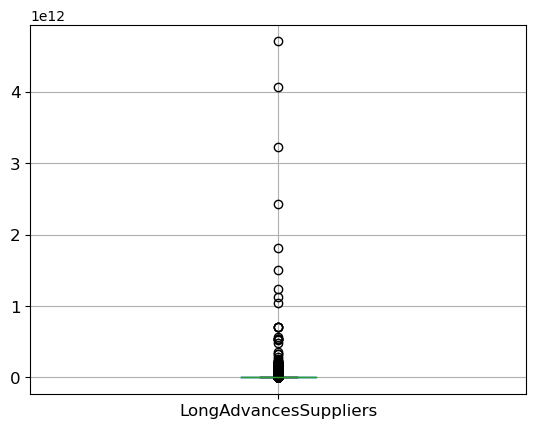

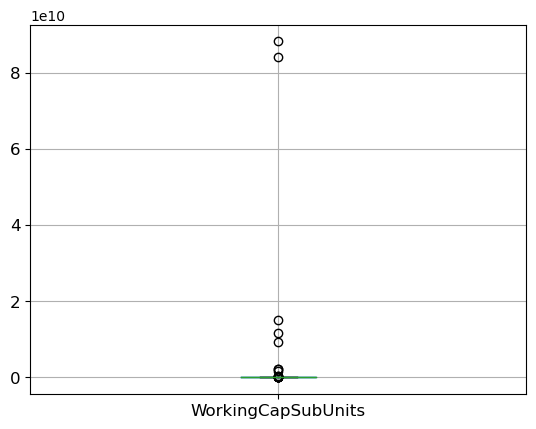

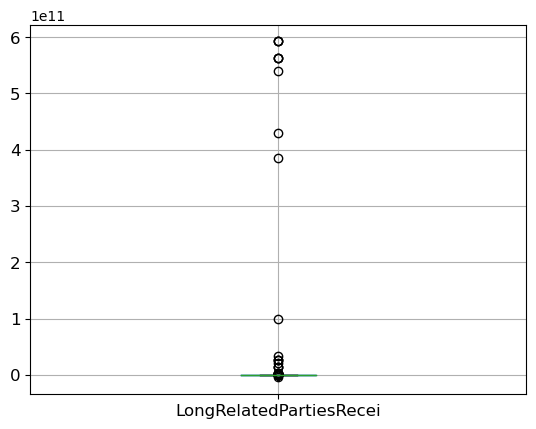

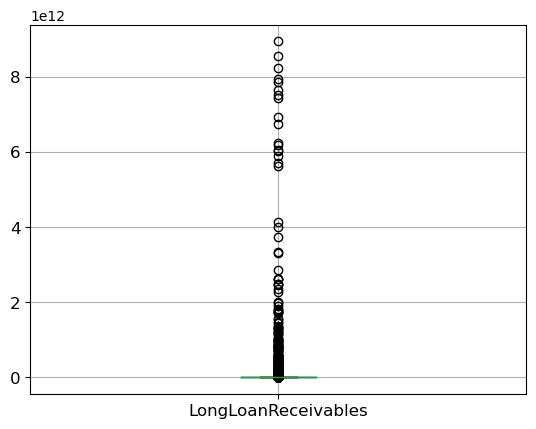

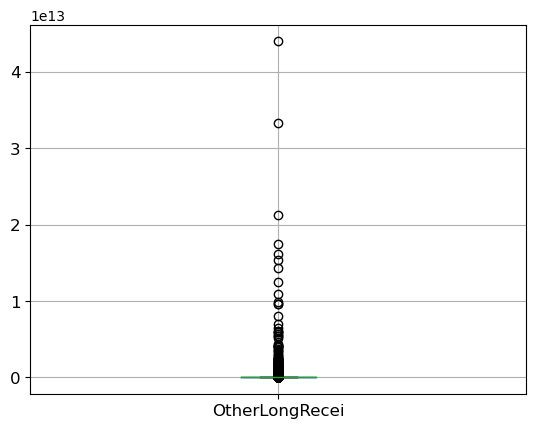

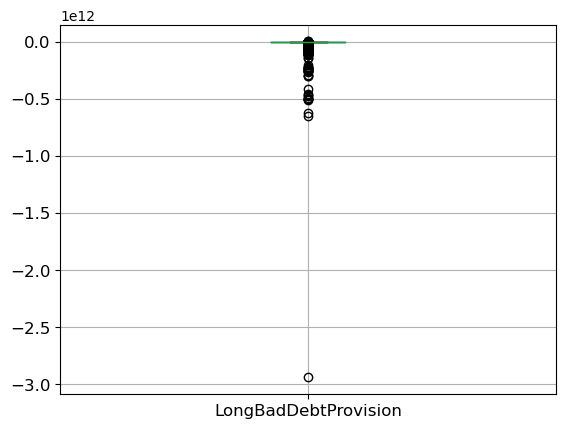

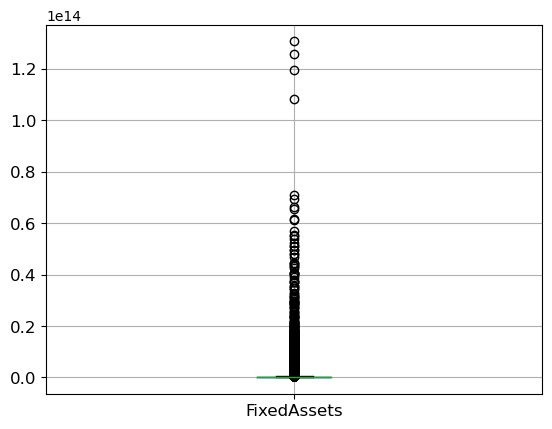

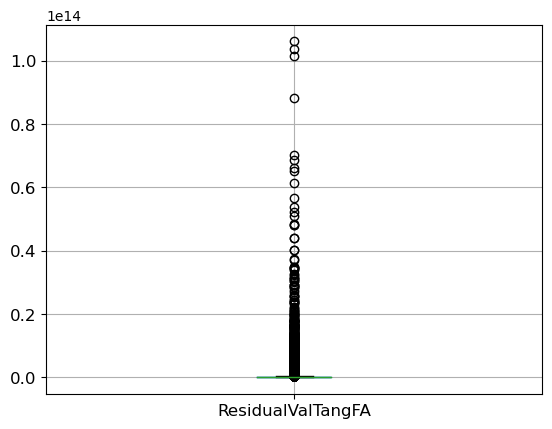

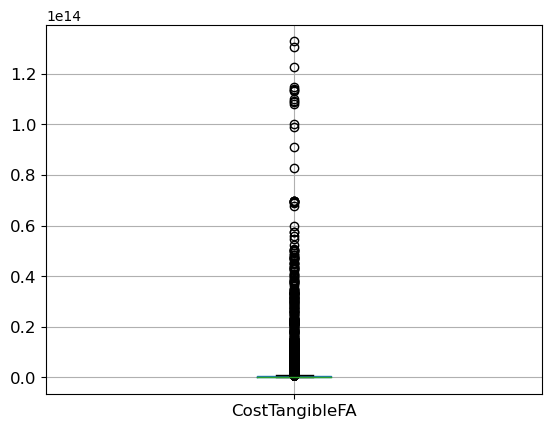

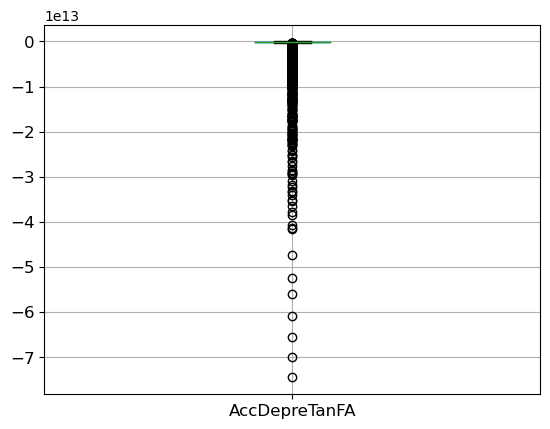

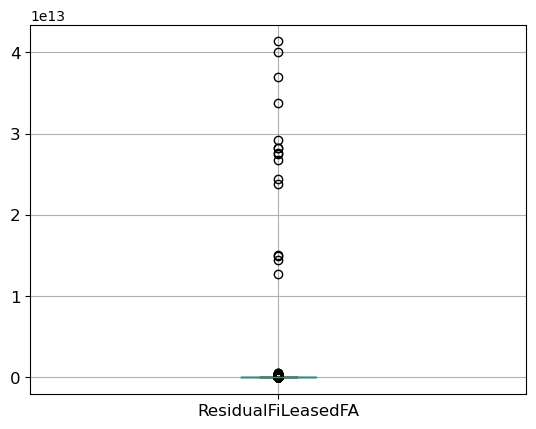

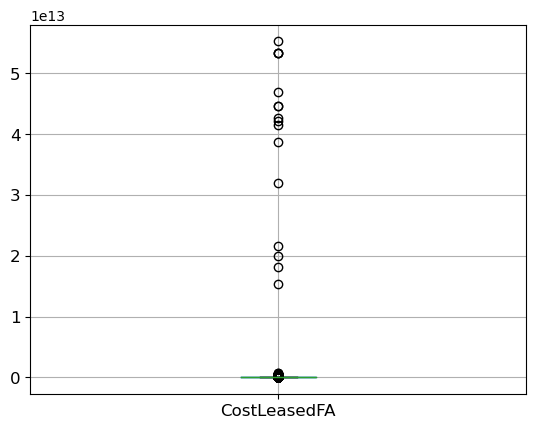

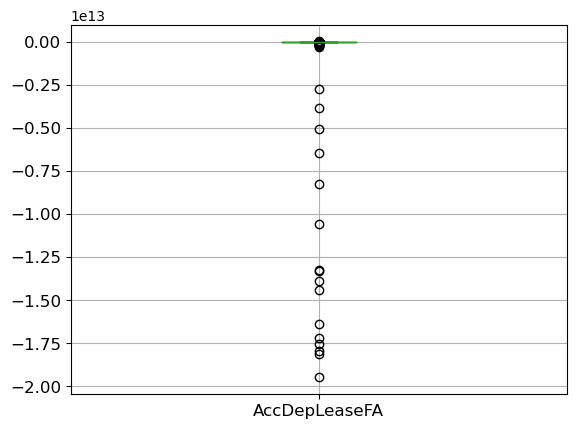

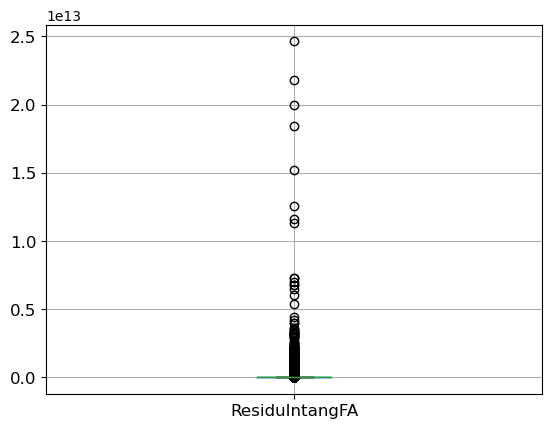

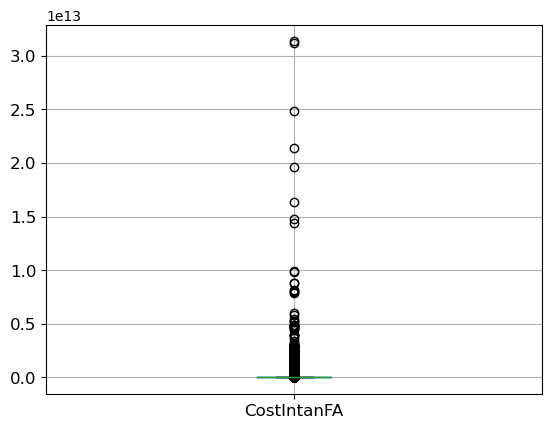

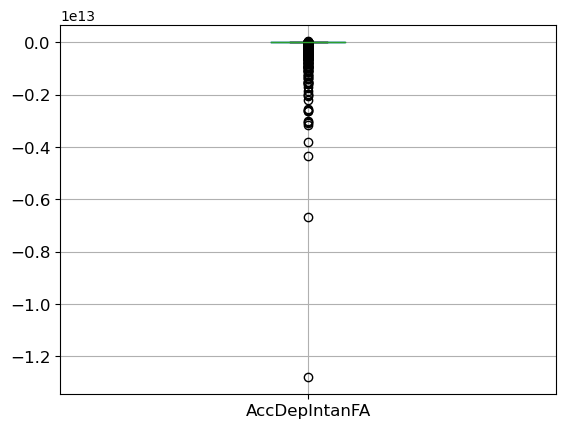

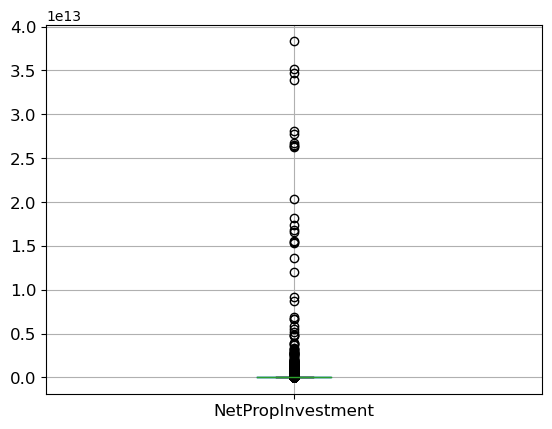

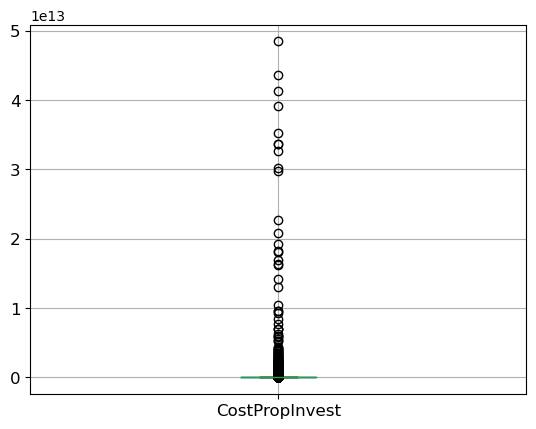

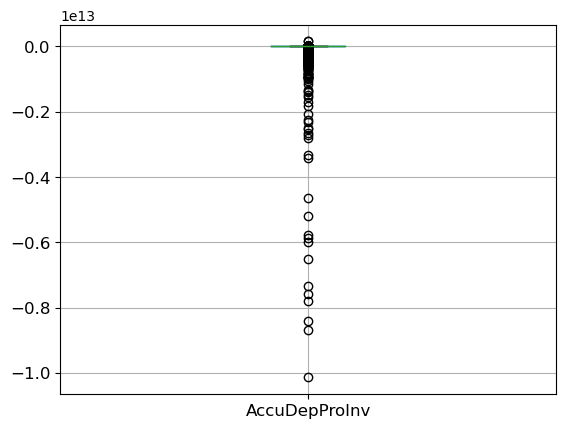

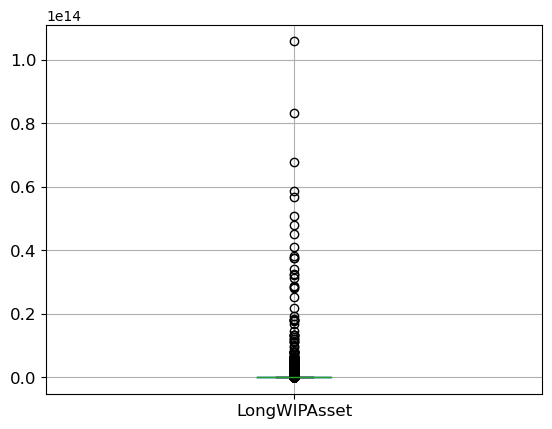

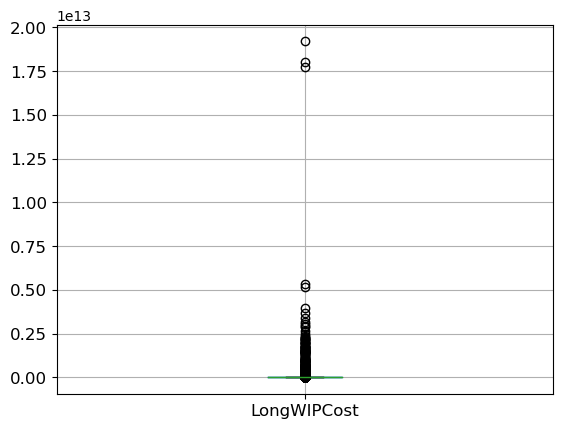

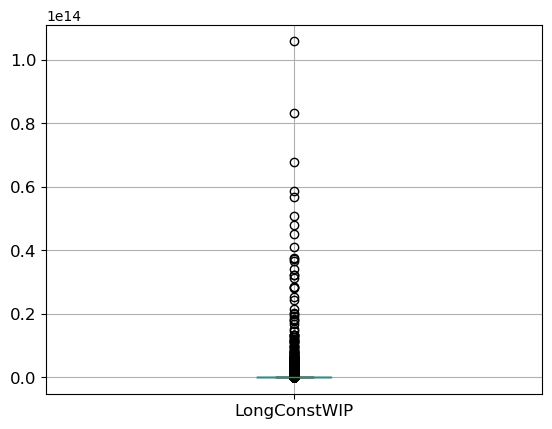

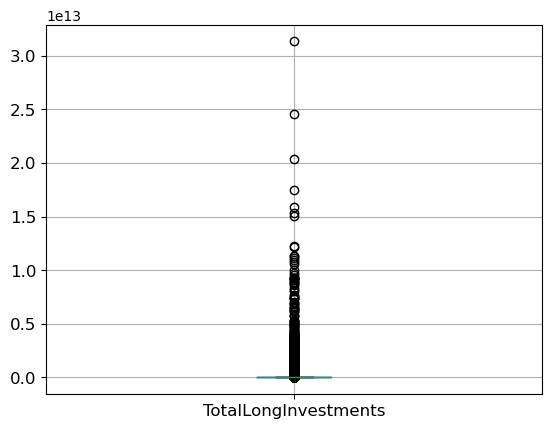

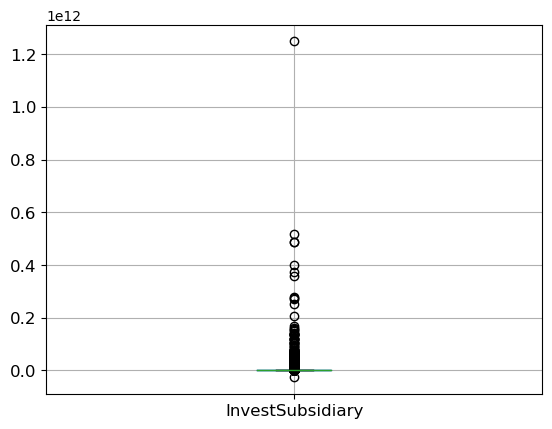

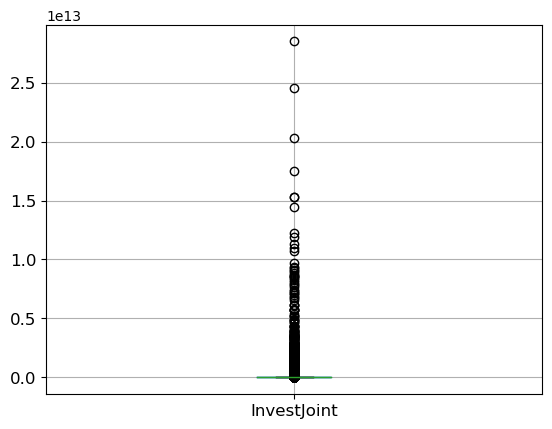

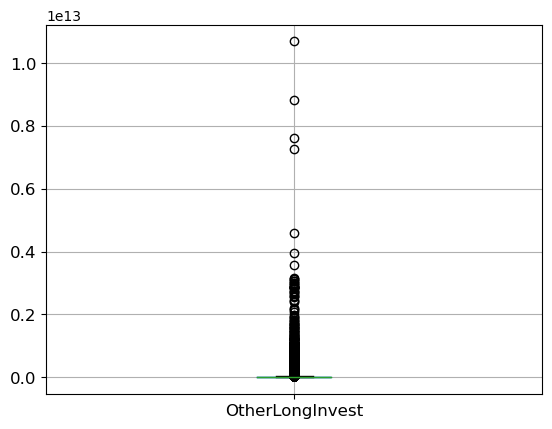

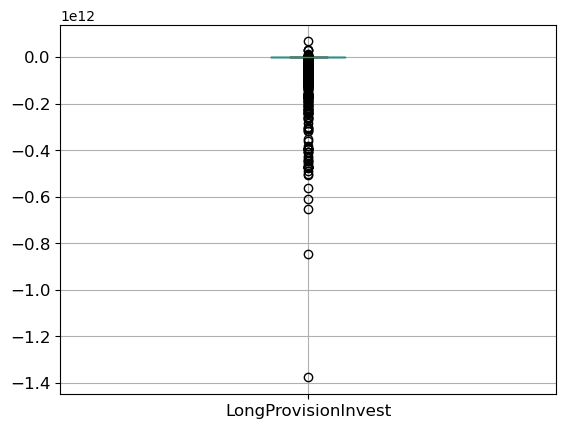

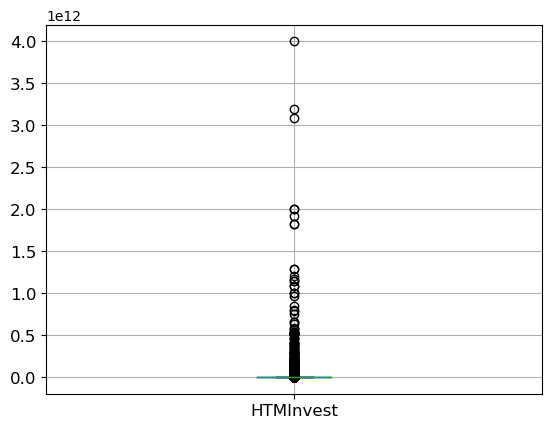

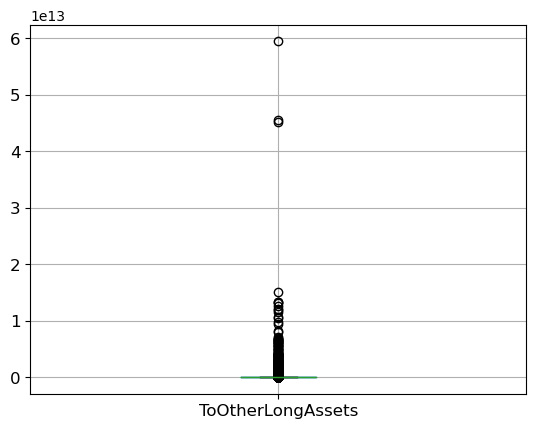

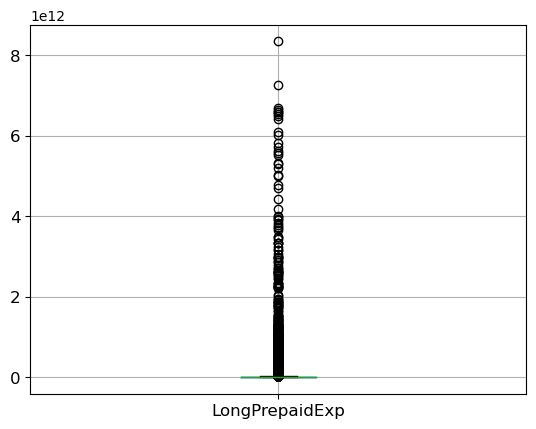

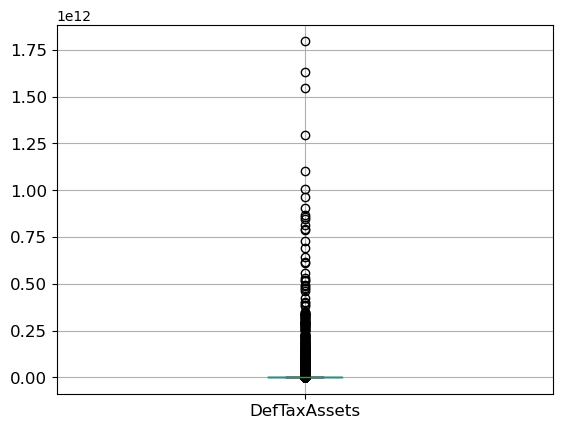

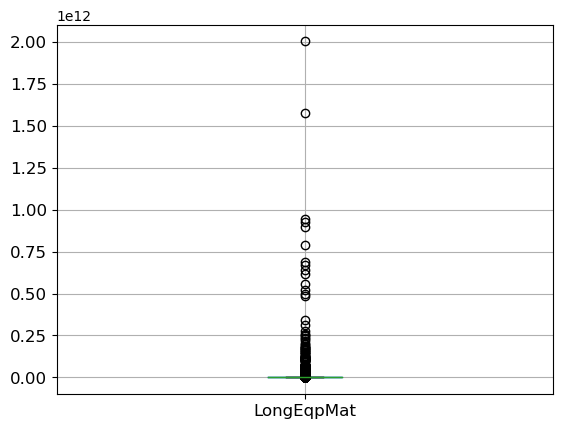

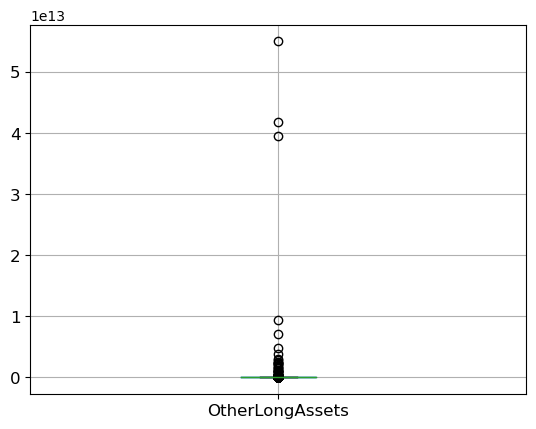

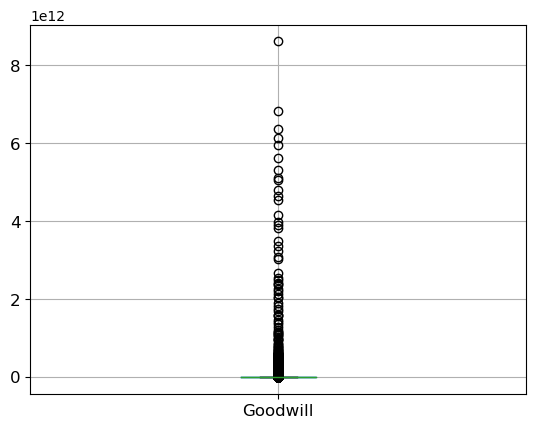

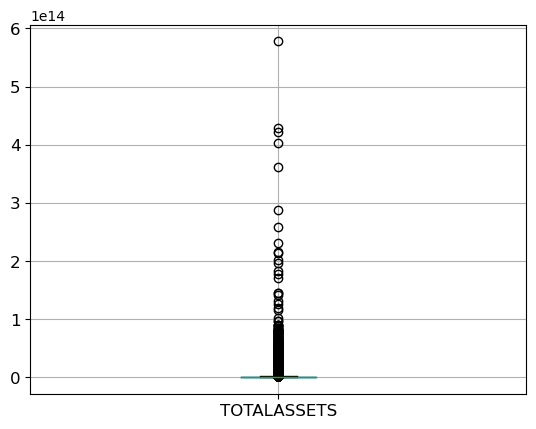

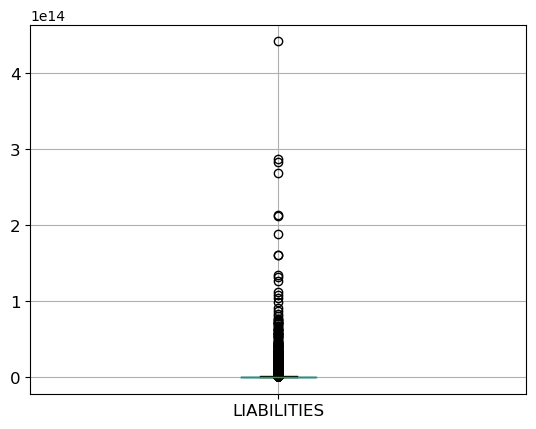

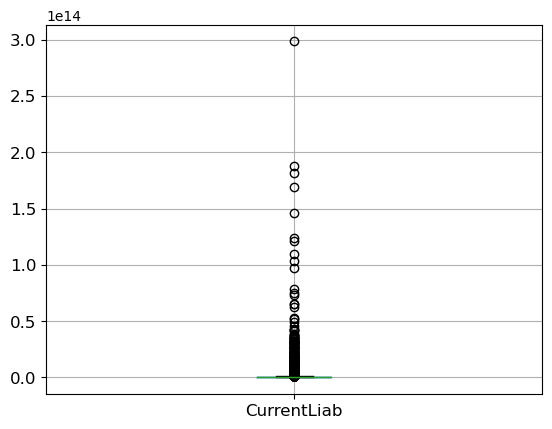

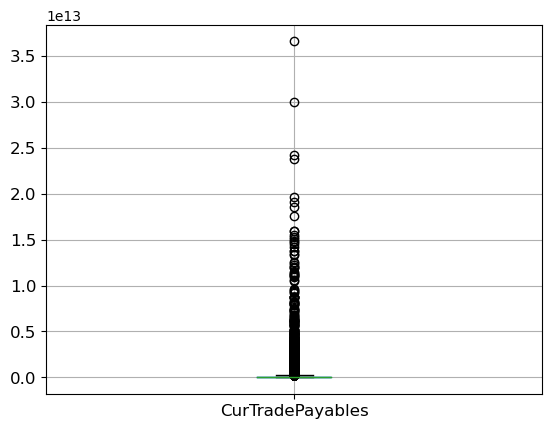

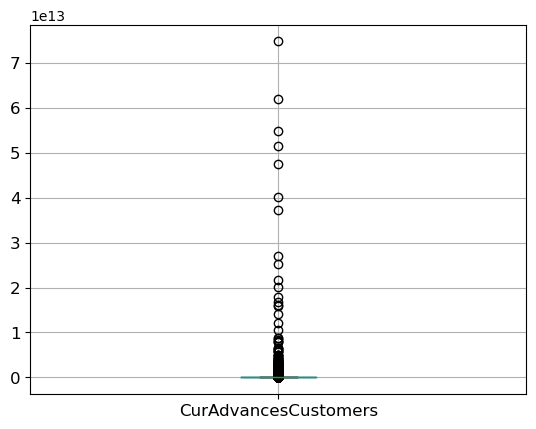

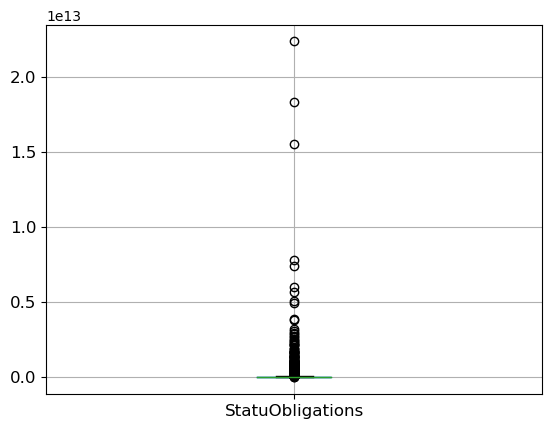

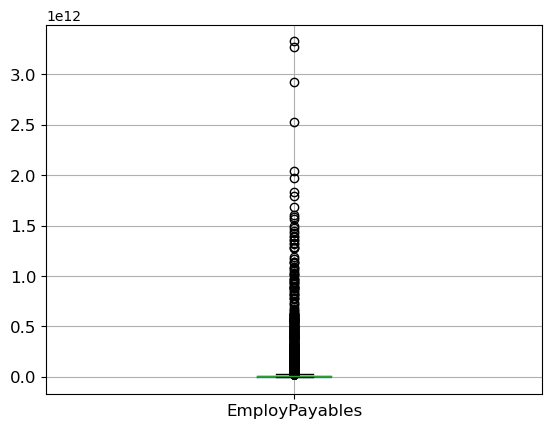

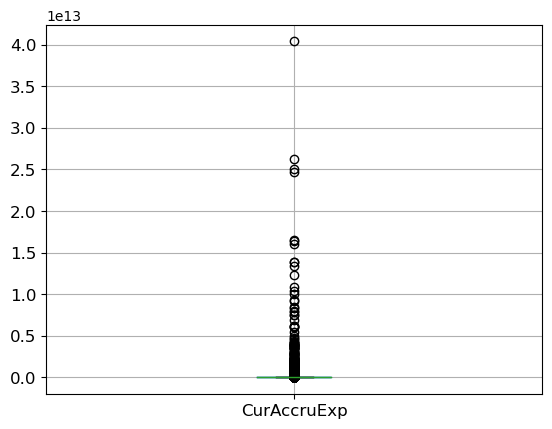

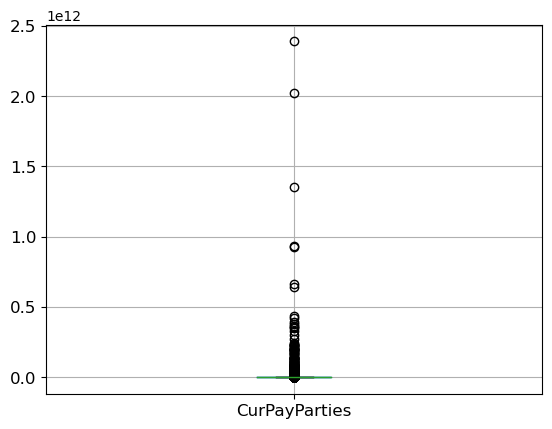

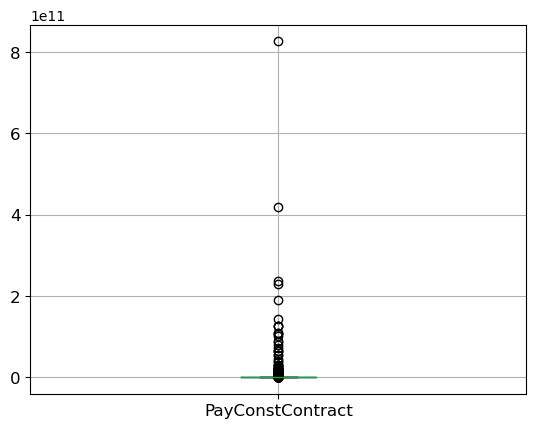

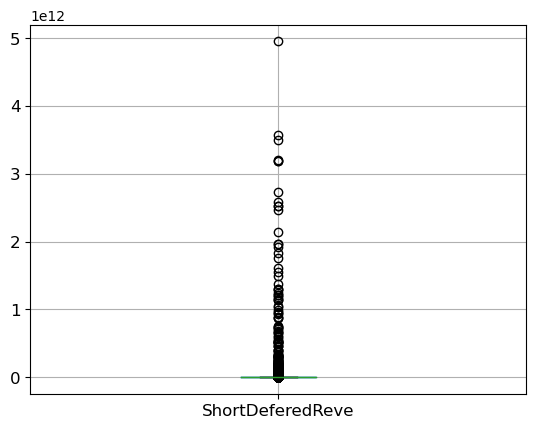

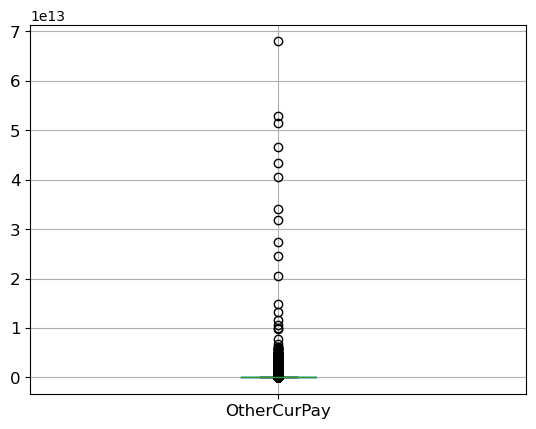

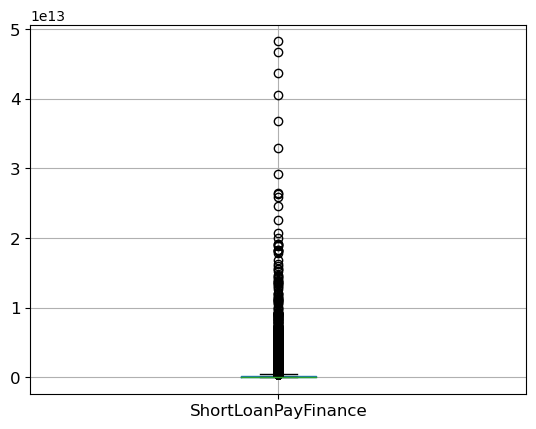

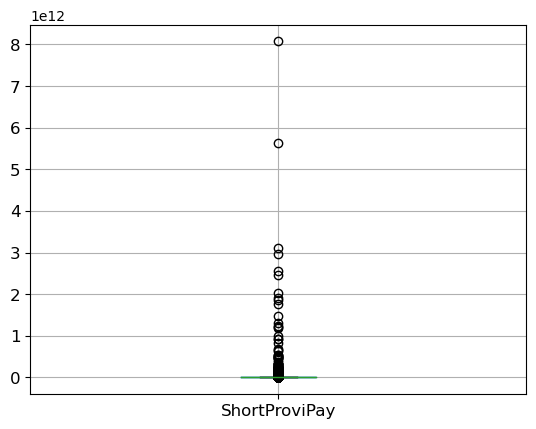

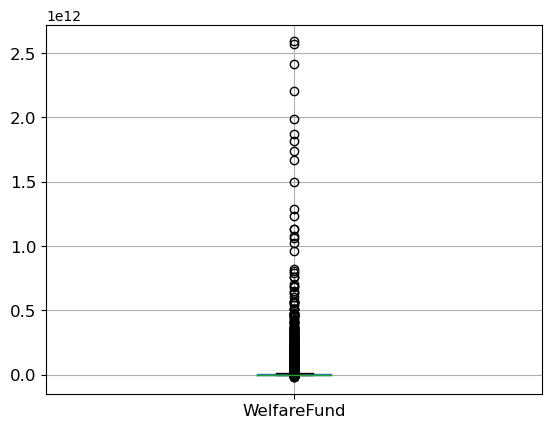

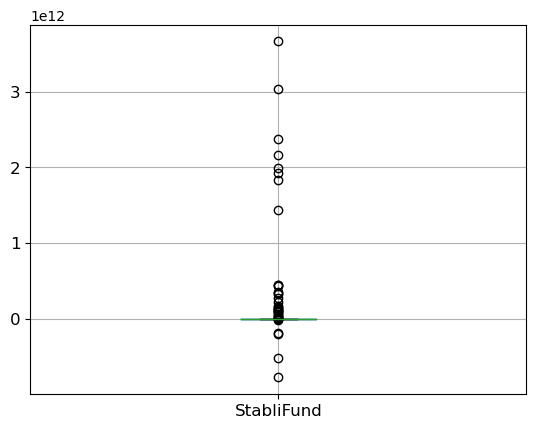

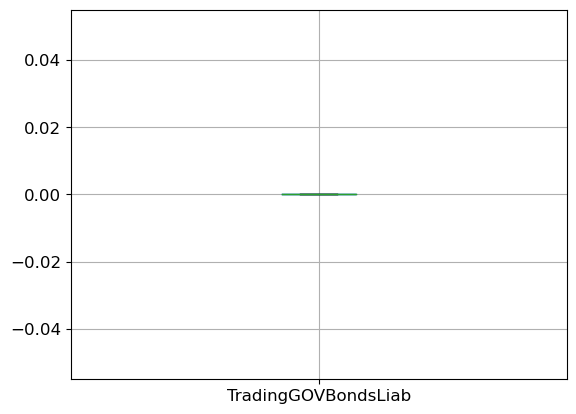

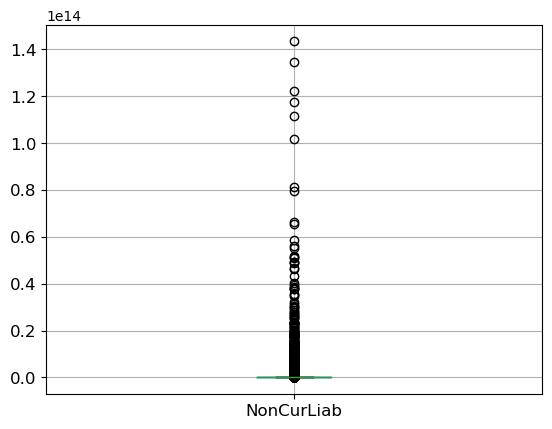

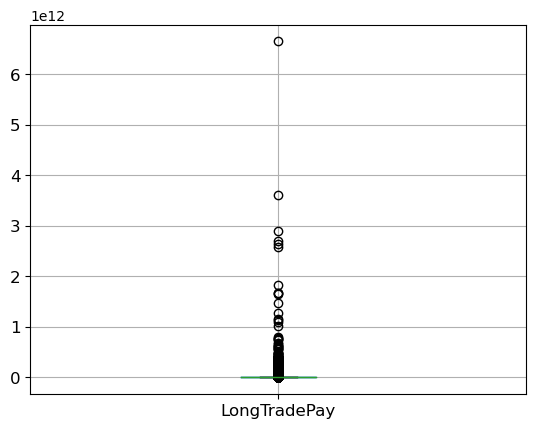

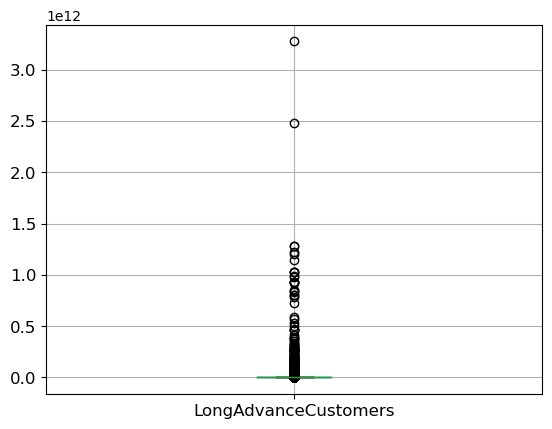

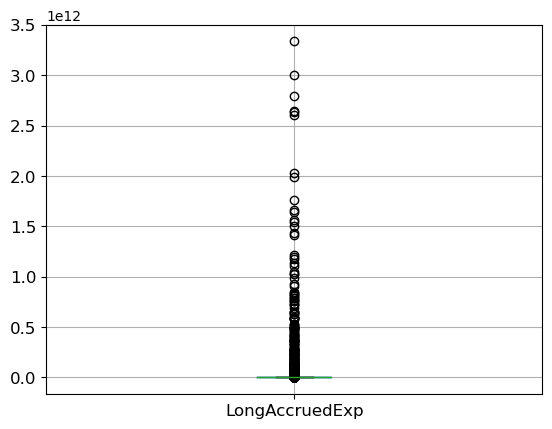

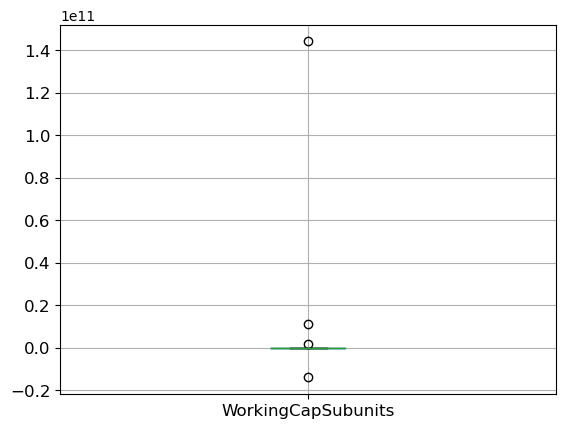

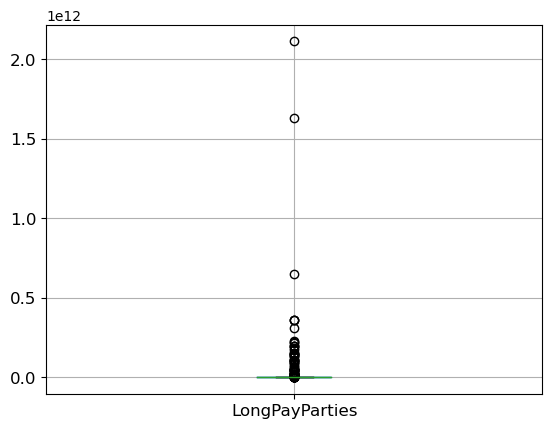

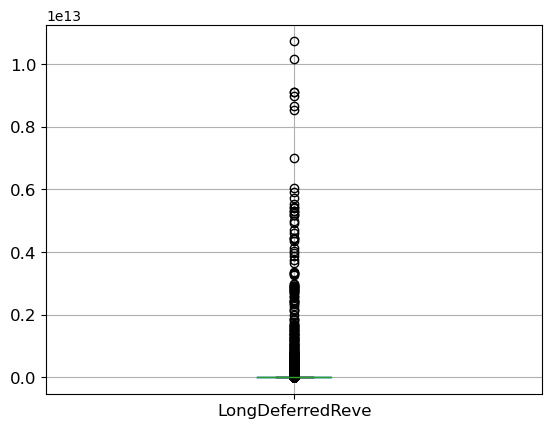

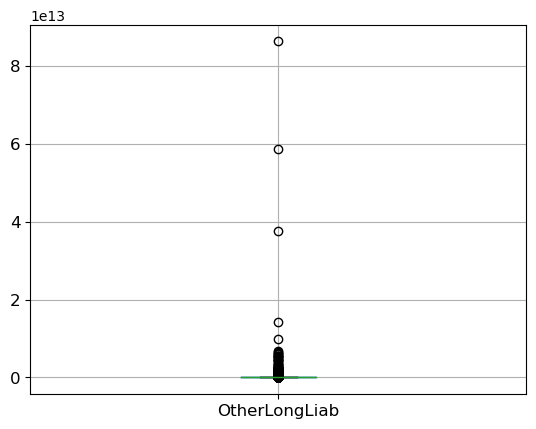

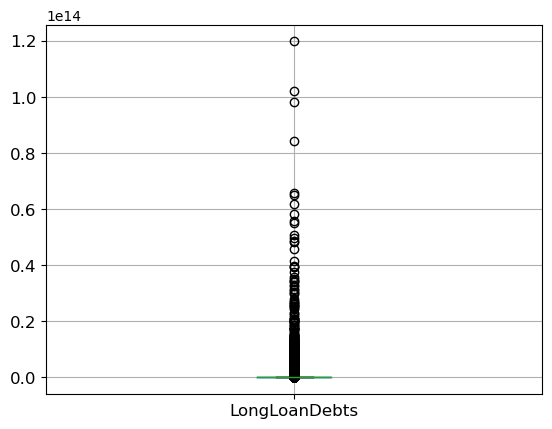

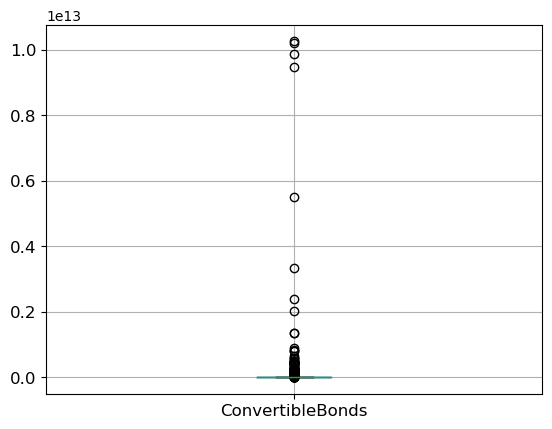

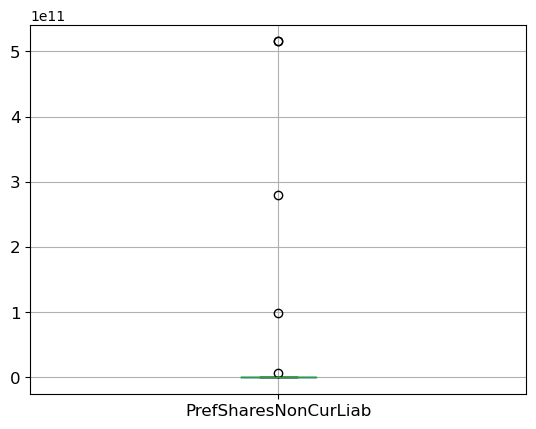

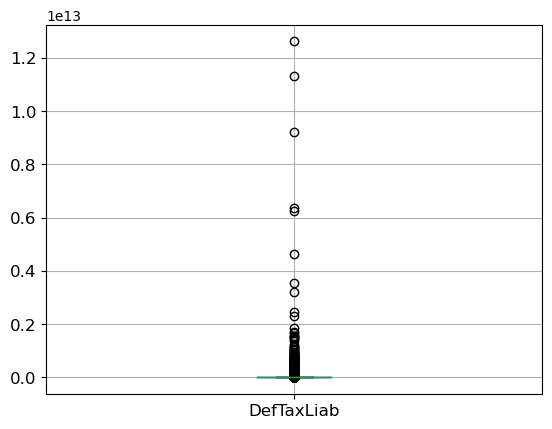

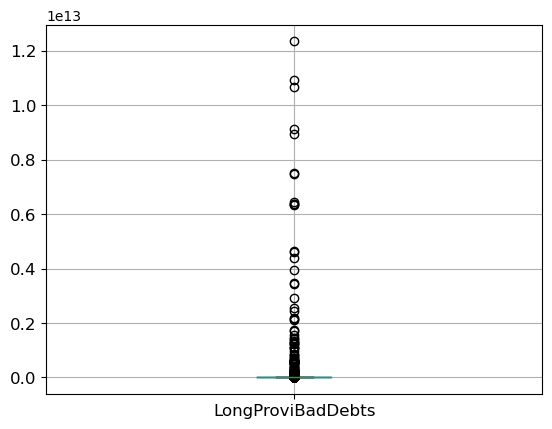

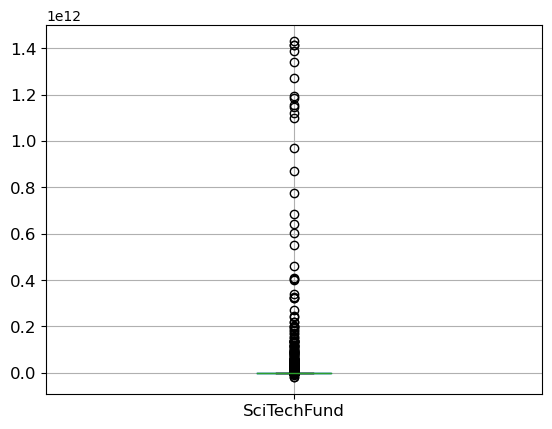

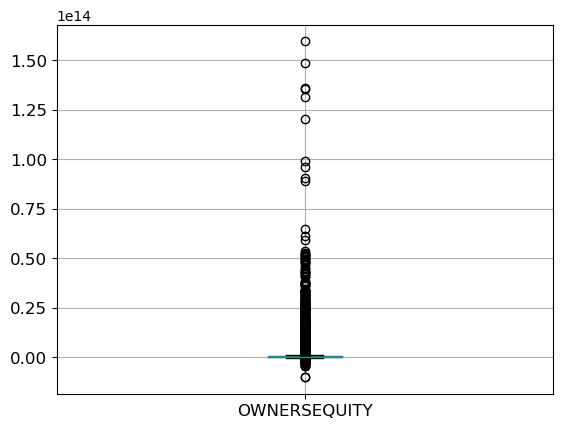

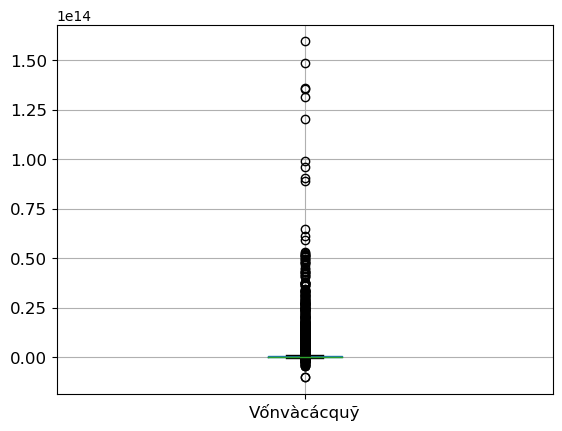

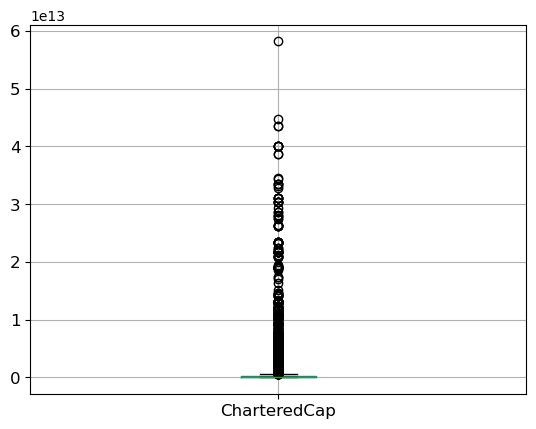

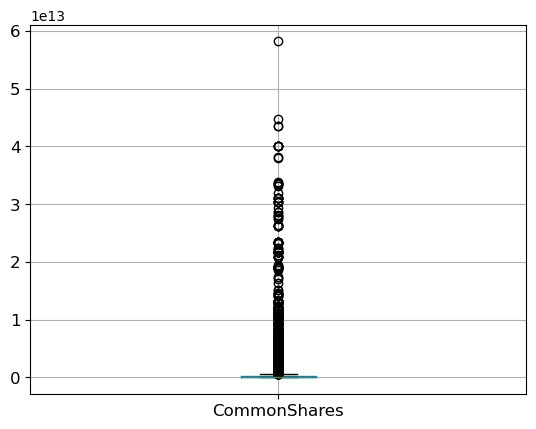

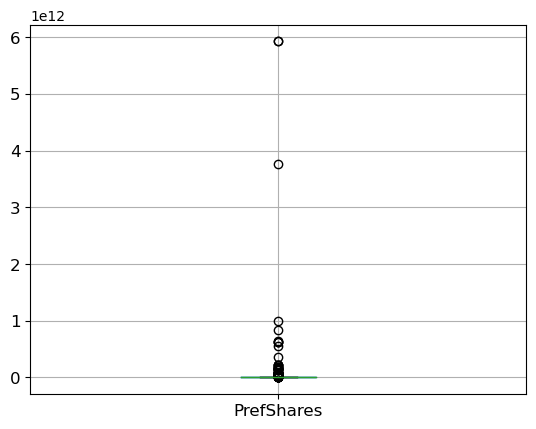

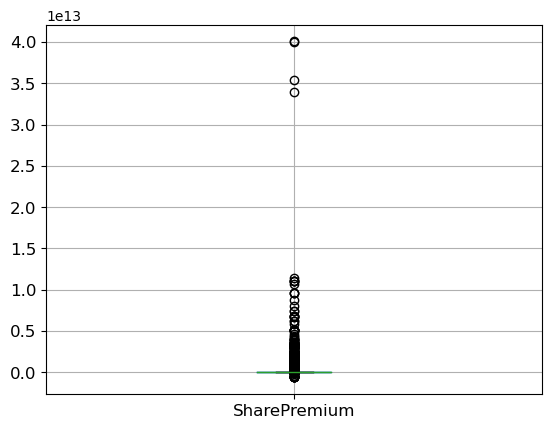

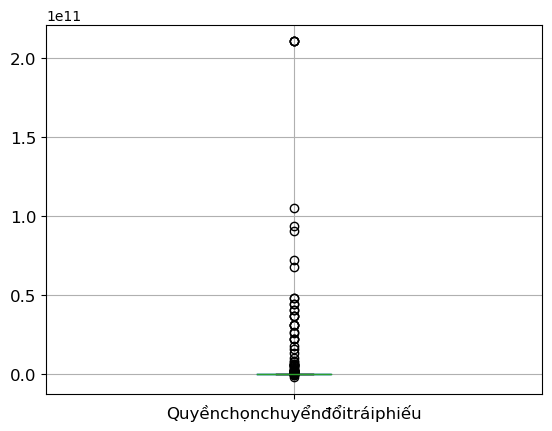

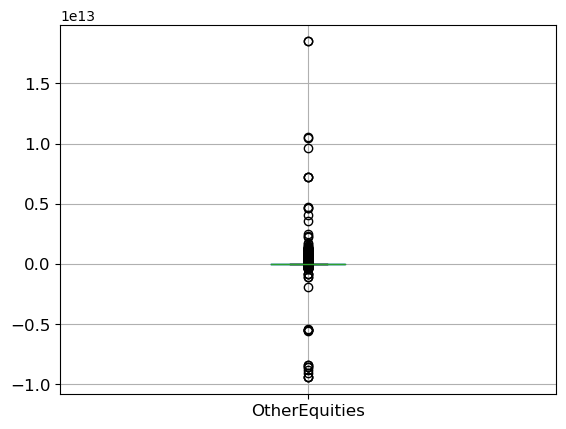

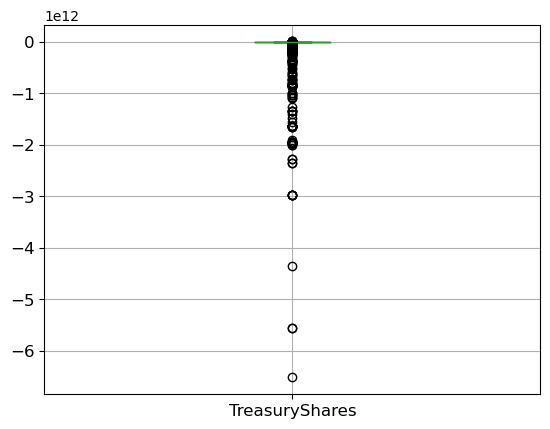

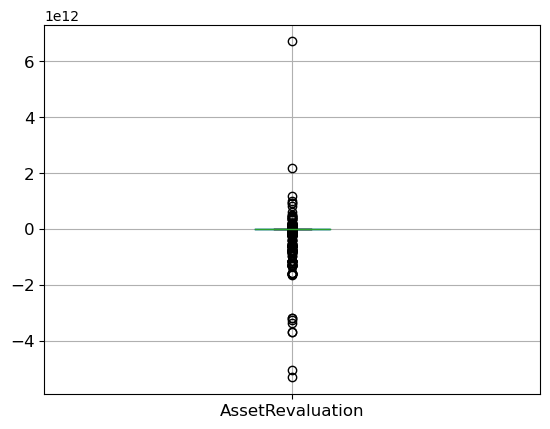

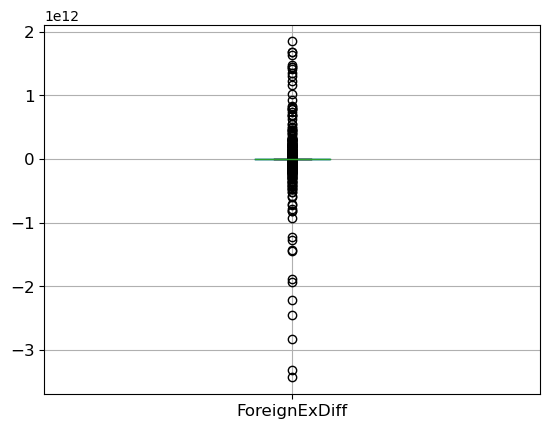

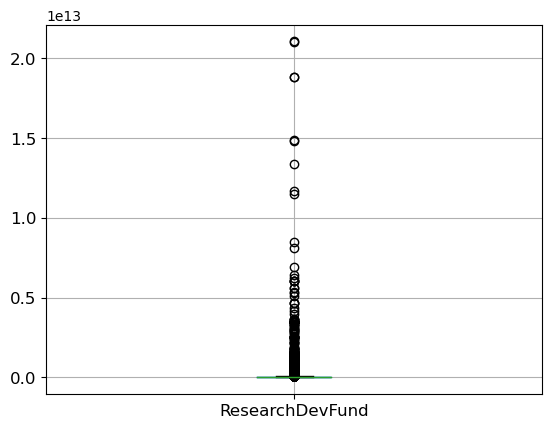

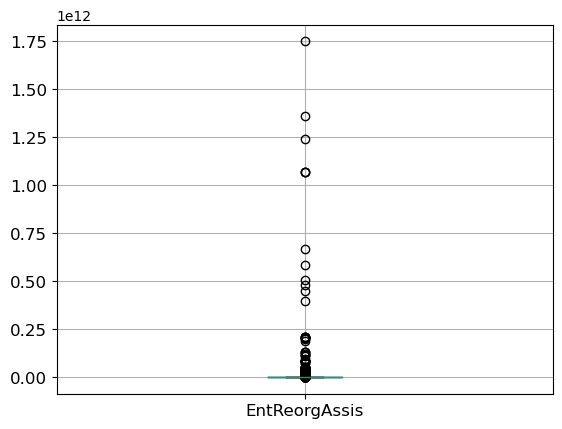

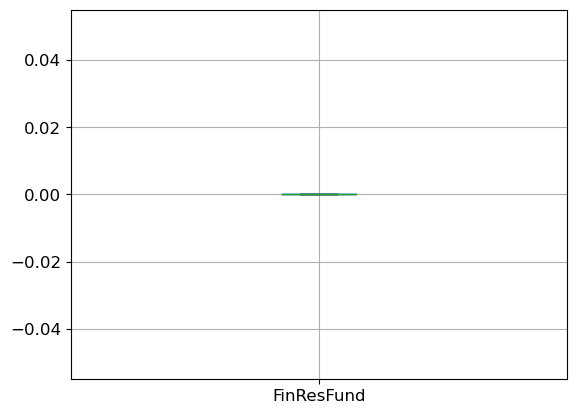

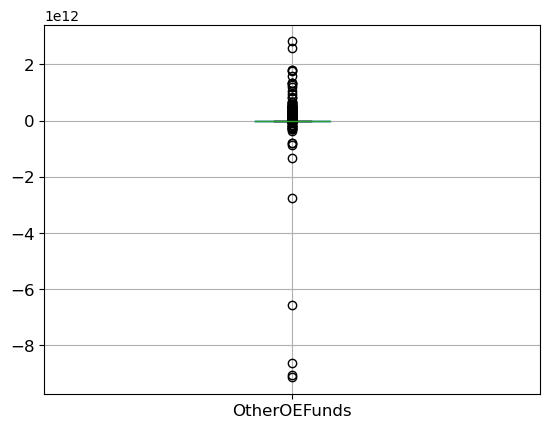

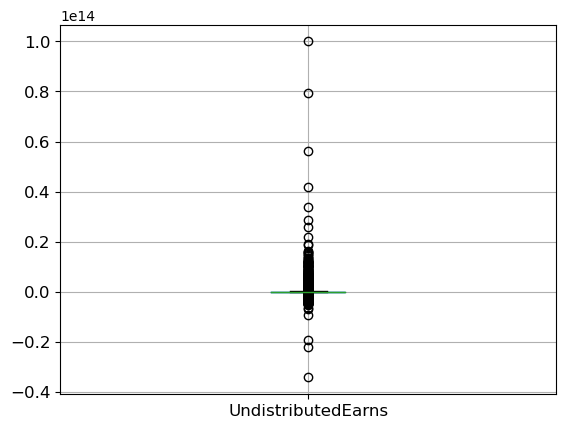

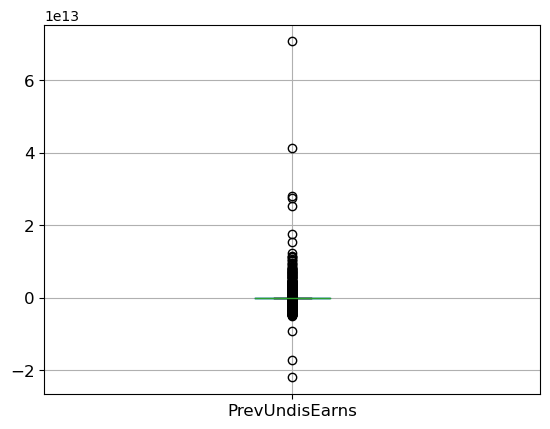

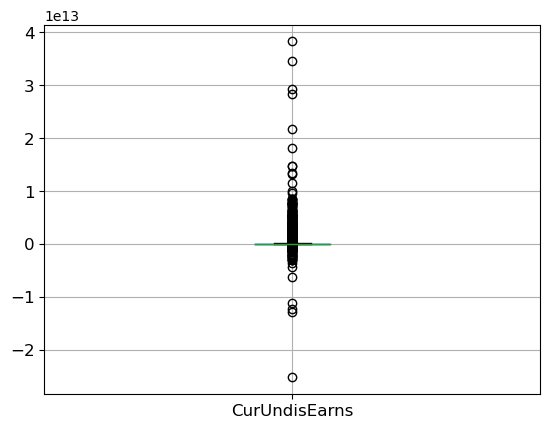

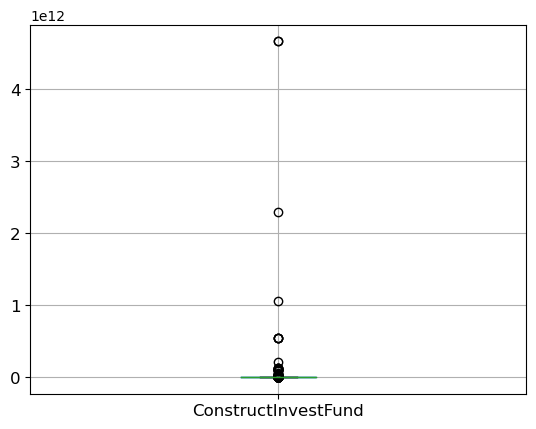

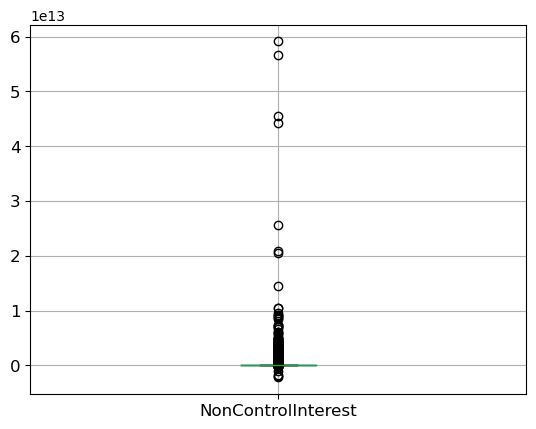

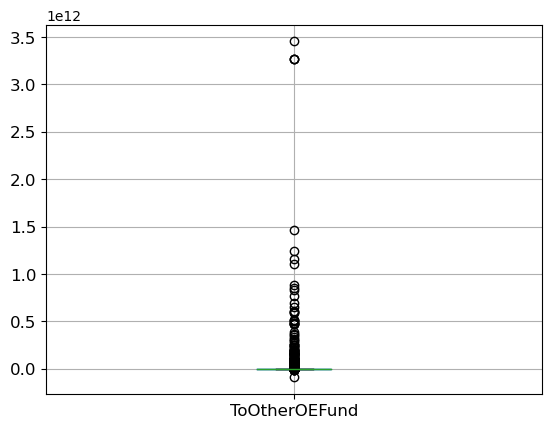

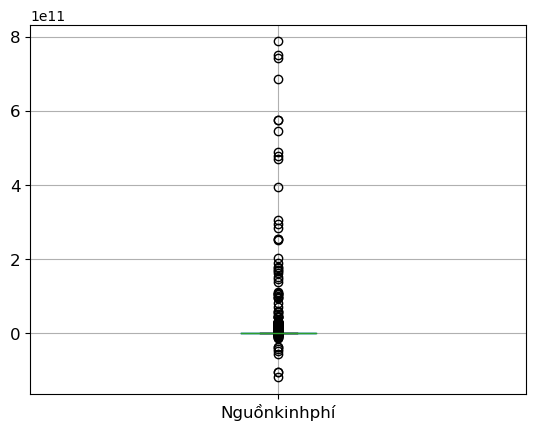

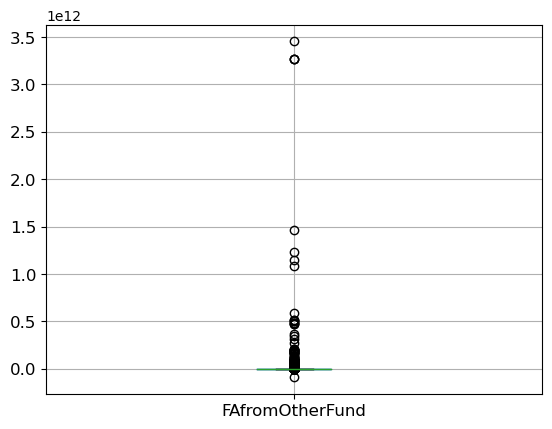

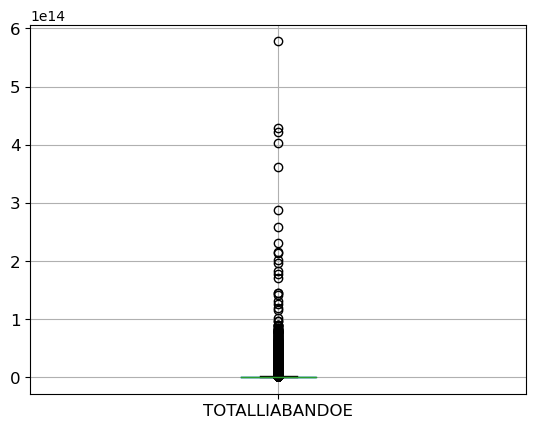

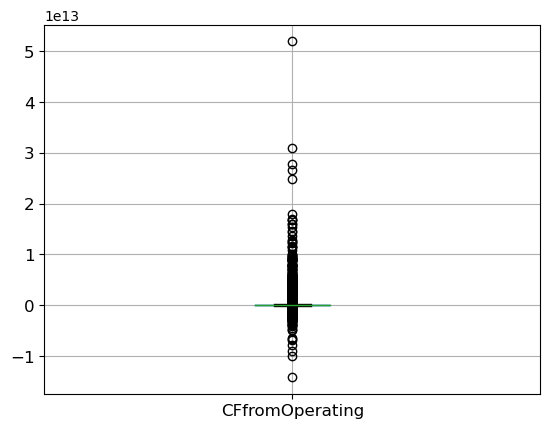

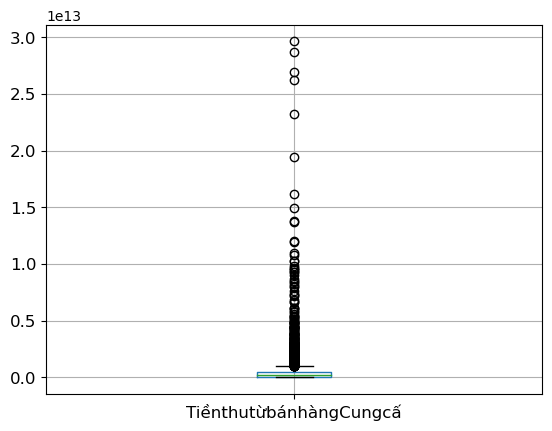

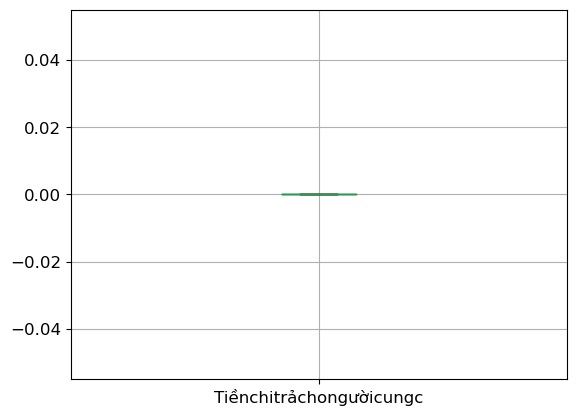

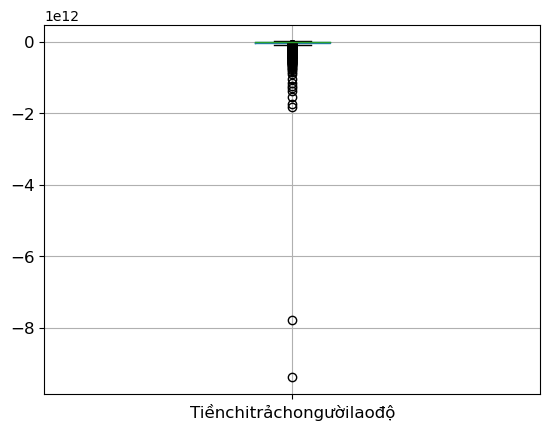

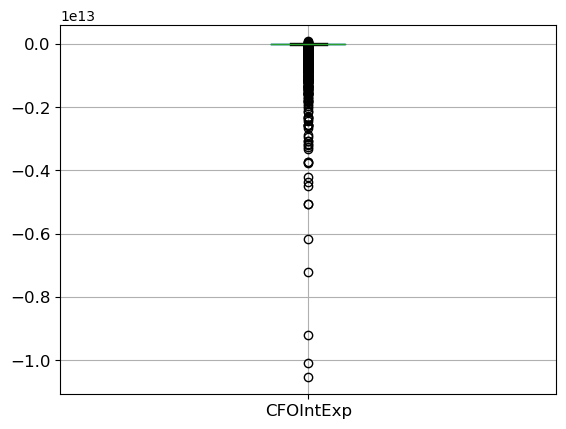

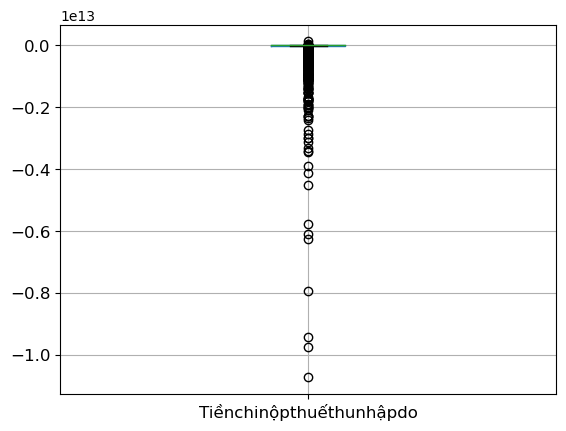

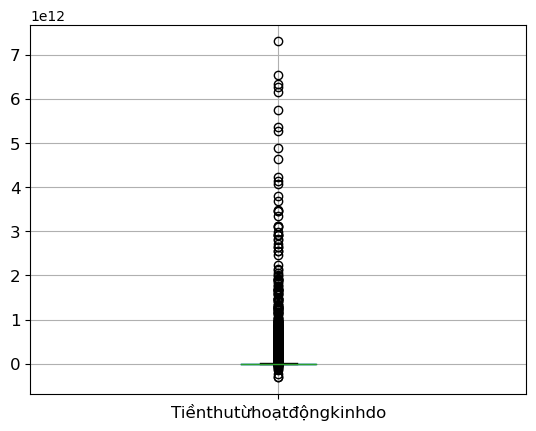

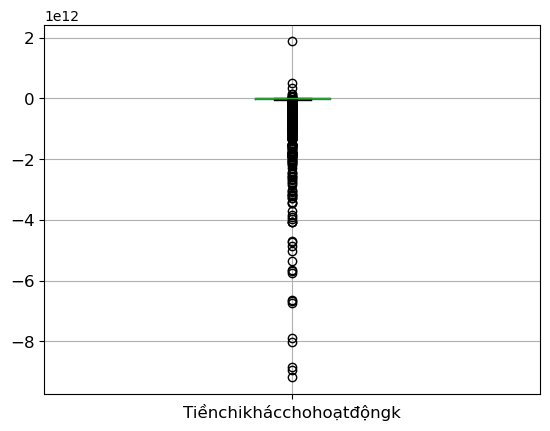

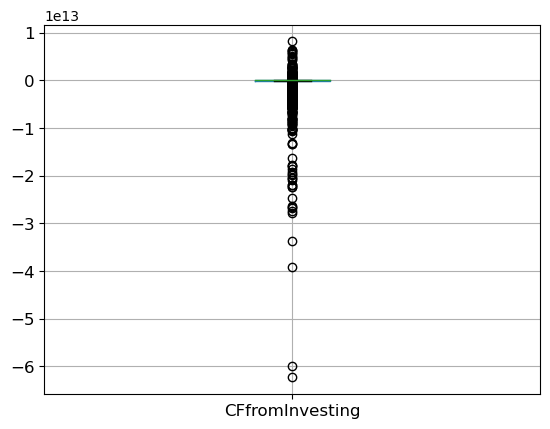

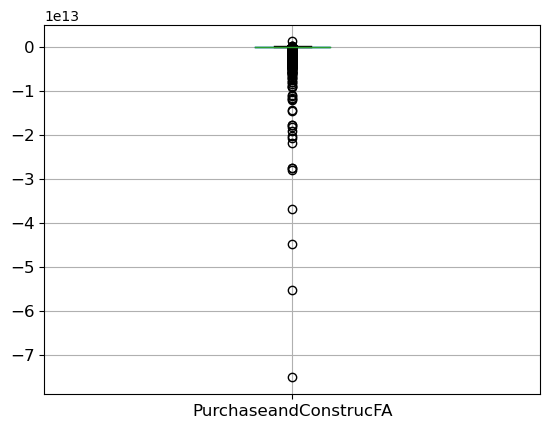

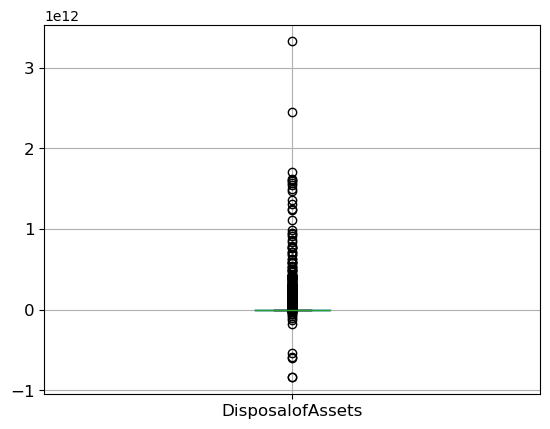

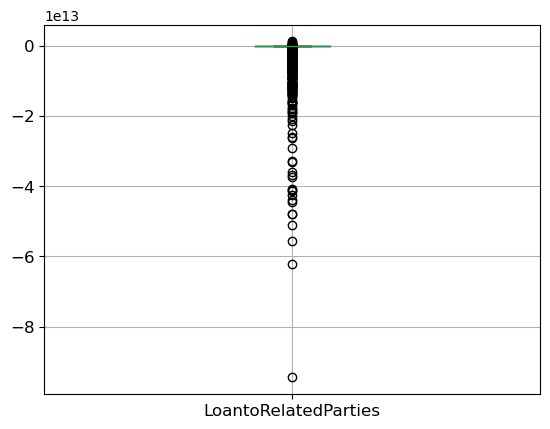

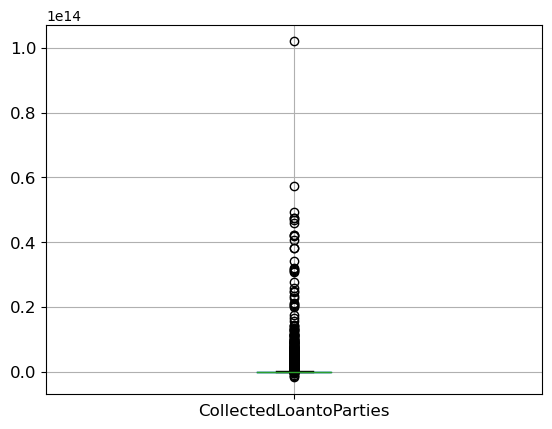

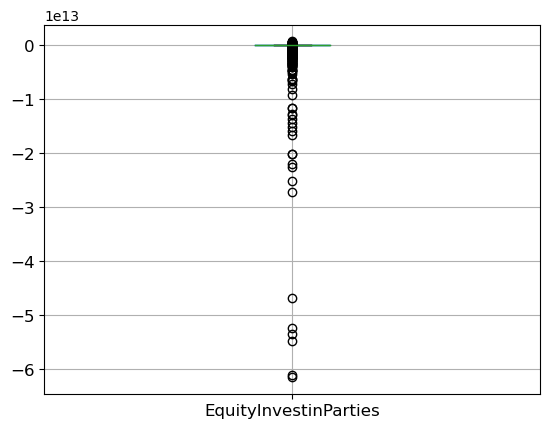

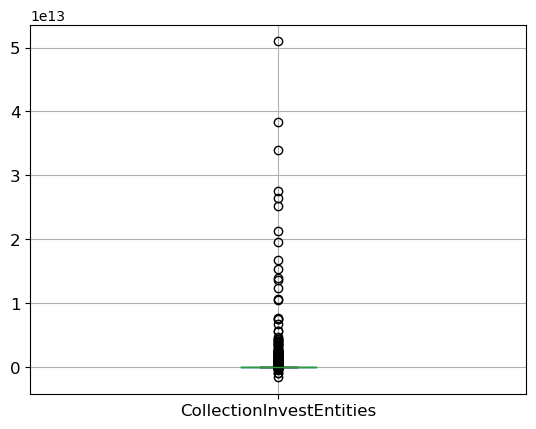

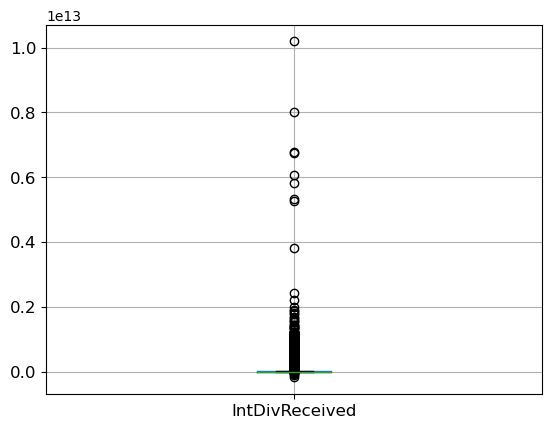

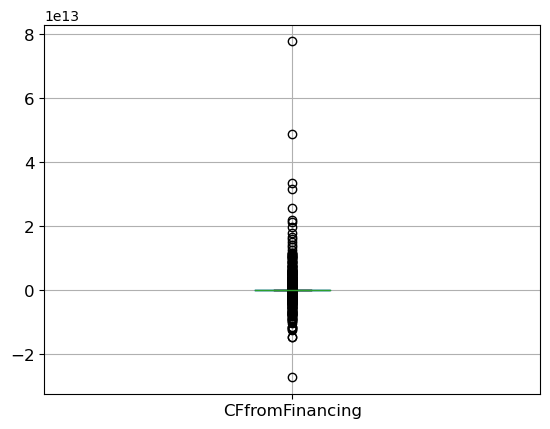

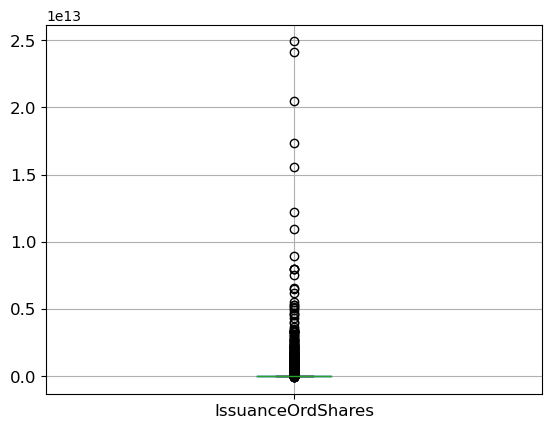

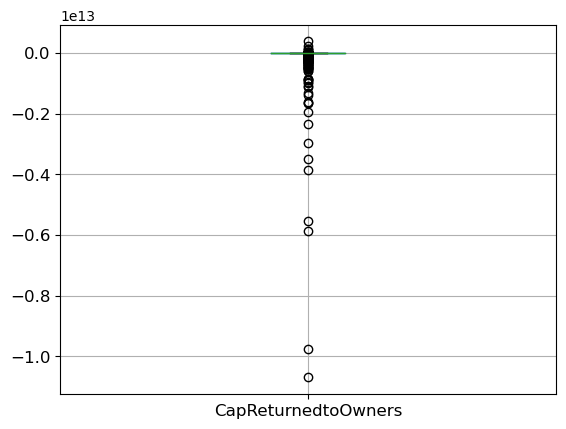

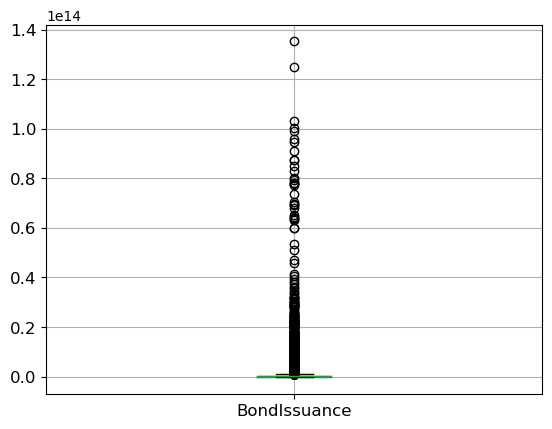

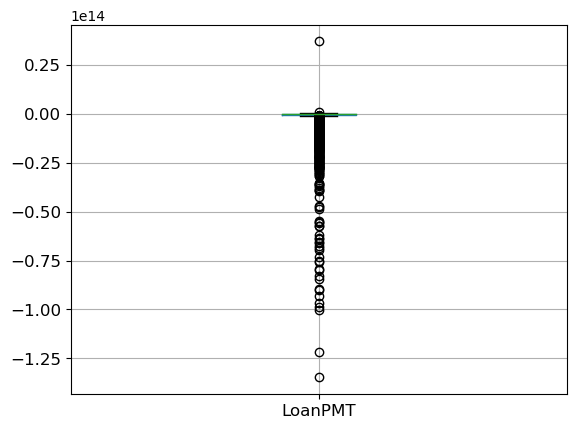

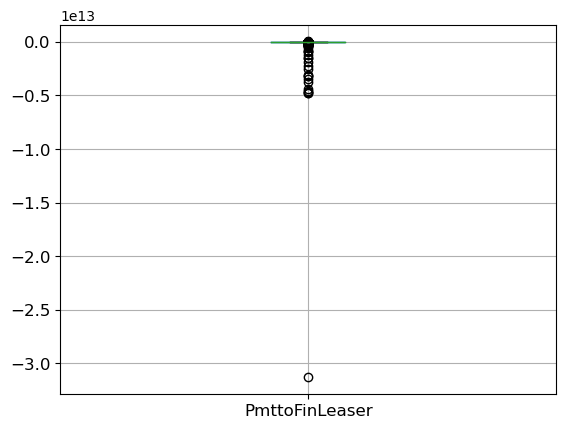

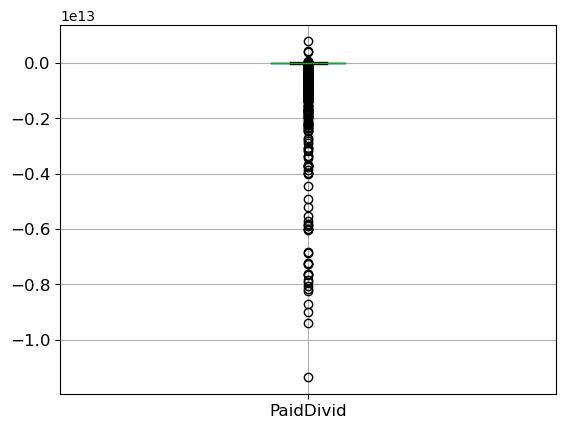

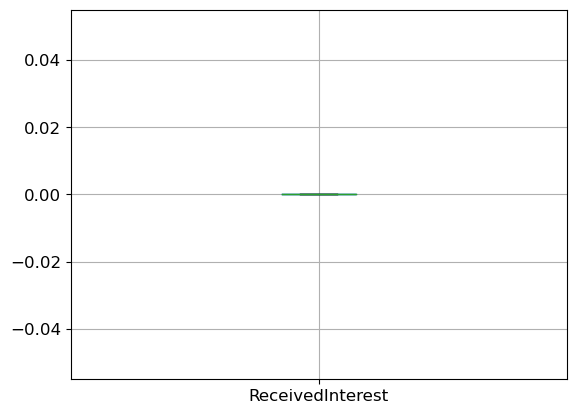

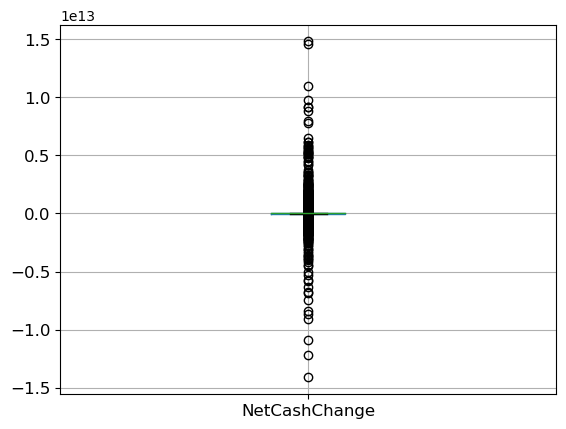

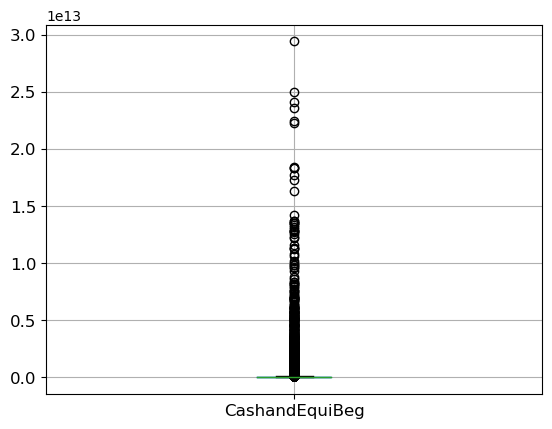

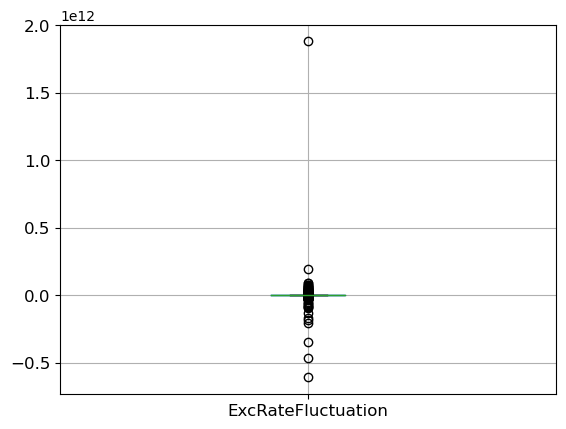

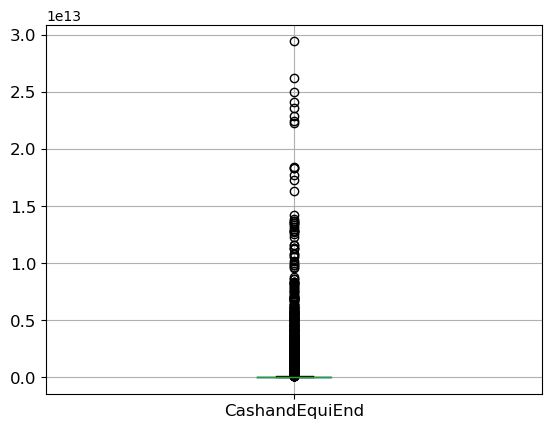

In [12]:
for c in numeric_columns:
    plt.figure()
    data.boxplot(c, rot=0, grid=True, fontsize=12);
    plt.show()

In [13]:
from scipy import stats

for c in numeric_columns:
    we=data[c].values

    zwe=stats.zscore(we)

    #Ngương 3
    outliers=np.unique(zwe[[(n<-3)|(n>3) for n in zwe]])
    indexes=[zwe.tolist().index(i) for i in outliers]
    print("Indexes of outliers: ", np.unique(indexes))
    print("Outlier values", we[indexes])


Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of outliers:  []
Outlier values []
Indexes of 

In [14]:
for i in data.columns:
    print(i)

id
Company
Index
Year
CashRatio
EBIT
EBITDA
GrossProfitMargin
EBITDARatio
EBITRatio
QuickRatio
CurrentRatio
LongDetboverOE
LongDebtoverTA
TotalDebtoverOE
TotalDebtoverTA
ShortDebtoverOE
ShortDebtoverTA
IAoverTA
TAoverOE
EBITDAoverShortDebtandExpenses
EBTMargin
NetProfitMarginRatio
TotalAssetTurnover
TotalEquityRatio
Tỷsuấtlợinhuậntừkinhdoanh
LNSTCFODoanhthu
Giátrịcổphiếu
TotalRevenue
SalesDeductions
NetRevenue
COGS
GrossProfit
RevenueFinancialActivities
FinancialExpenses
InterestExpenses
Lãilỗtừcôngtyliêndoanh
SellingExpenses
AdminExpensesCons
OperatingIncomeCons
OtherRevenue
OtherExpenses
OtherIncome
AccountingIncomePreTax
CorpTaxExpenses
CurrentCorpTax
DeferredIncomeTax
IncomeAfterDefTax
MinorityInterest
Cổđôngcủacôngtymẹ
EarningPerShare
DilutedEarningsPerShare
CURRENTASSETS
Cash
CashEquivalents
ShortTermInvestments
TradingSecurities
AllowanceDeclineInSec
HTMInvestments
CurrentReceivables
CurTradeReceivables
CurAdvancestoSuppliers
RelatedPartiesReceivables
ConstructionReceivables
Sho

In [15]:
target_cols =['CashRatio','IAoverTA','TotalDebtoverTA','IncomeAfterDefTax','TOTALASSETS','OWNERSEQUITY','GrossProfitMargin','TotalRevenue','NetRevenue','SciTechFund','StabliFund','WelfareFund','ResearchDevFund','OtherOEFunds','ToOtherOEFund','ConstructInvestFund']

In [16]:
df = data[target_cols]
df

,CashRatio,IAoverTA,TotalDebtoverTA,IncomeAfterDefTax,TOTALASSETS,OWNERSEQUITY,GrossProfitMargin,TotalRevenue,NetRevenue,SciTechFund,StabliFund,WelfareFund,ResearchDevFund,OtherOEFunds,ToOtherOEFund,ConstructInvestFund
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26624,0.08,0.00,0.45,1.408963e+10,7.689286e+11,5.651732e+10,0.1744,5.385858e+11,5.294362e+11,0.0,0.0,1.090178e+09,2.049601e+10,0.0,0.0,0.0
26625,0.21,0.00,0.37,1.512057e+10,7.521980e+11,5.990139e+10,0.1836,5.188880e+11,5.097490e+11,0.0,0.0,4.219413e+08,2.276410e+10,0.0,0.0,0.0
26626,0.03,0.00,0.23,-1.201308e+10,9.955348e+11,1.345908e+10,0.0861,6.100434e+11,5.664693e+11,0.0,0.0,1.790278e+07,2.276410e+10,0.0,0.0,0.0
26627,0.02,0.01,0.28,1.066498e+10,7.808035e+11,2.174660e+10,0.0868,6.089154e+11,6.042646e+11,0.0,0.0,6.502775e+06,0.000000e+00,0.0,0.0,0.0


In [17]:
df.dropna(inplace=True)

In [18]:
df

,CashRatio,IAoverTA,TotalDebtoverTA,IncomeAfterDefTax,TOTALASSETS,OWNERSEQUITY,GrossProfitMargin,TotalRevenue,NetRevenue,SciTechFund,StabliFund,WelfareFund,ResearchDevFund,OtherOEFunds,ToOtherOEFund,ConstructInvestFund
13,0.29,0.00,0.02,4.696082e+10,4.349303e+11,2.236127e+11,0.1190,6.914857e+11,6.914857e+11,0.0,0.0,3.408345e+09,9.598561e+10,0.000000e+00,-3200000.0,0.0
14,0.18,0.00,0.00,4.210703e+10,4.882955e+11,2.422169e+11,0.1092,7.285825e+11,7.285810e+11,0.0,0.0,4.099816e+09,1.124009e+11,0.000000e+00,-5910000.0,0.0
15,0.34,0.00,0.00,3.460926e+10,5.281309e+11,2.383852e+11,0.1098,6.501481e+11,6.501481e+11,0.0,0.0,1.033755e+10,1.250330e+11,0.000000e+00,328000000.0,0.0
16,0.17,0.00,0.00,3.666673e+10,5.474523e+11,2.153997e+11,0.1298,7.192805e+11,7.192805e+11,0.0,0.0,1.657060e+10,1.250330e+11,0.000000e+00,0.0,0.0
21,0.09,0.00,0.40,1.096657e+08,6.449785e+11,3.225388e+11,0.2748,9.140000e+02,-6.686928e+08,0.0,0.0,2.563010e+08,2.580392e+09,2.461546e+09,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26624,0.08,0.00,0.45,1.408963e+10,7.689286e+11,5.651732e+10,0.1744,5.385858e+11,5.294362e+11,0.0,0.0,1.090178e+09,2.049601e+10,0.000000e+00,0.0,0.0
26625,0.21,0.00,0.37,1.512057e+10,7.521980e+11,5.990139e+10,0.1836,5.188880e+11,5.097490e+11,0.0,0.0,4.219413e+08,2.276410e+10,0.000000e+00,0.0,0.0
26626,0.03,0.00,0.23,-1.201308e+10,9.955348e+11,1.345908e+10,0.0861,6.100434e+11,5.664693e+11,0.0,0.0,1.790278e+07,2.276410e+10,0.000000e+00,0.0,0.0
26627,0.02,0.01,0.28,1.066498e+10,7.808035e+11,2.174660e+10,0.0868,6.089154e+11,6.042646e+11,0.0,0.0,6.502775e+06,0.000000e+00,0.000000e+00,0.0,0.0


In [19]:
# Tính ROA
df['ROA'] = df['IncomeAfterDefTax'] / df['TOTALASSETS']

# Tính ROE
df['ROE'] = df['IncomeAfterDefTax'] / df['OWNERSEQUITY']
df

,CashRatio,IAoverTA,TotalDebtoverTA,IncomeAfterDefTax,TOTALASSETS,OWNERSEQUITY,GrossProfitMargin,TotalRevenue,NetRevenue,SciTechFund,StabliFund,WelfareFund,ResearchDevFund,OtherOEFunds,ToOtherOEFund,ConstructInvestFund,ROA,ROE
13,0.29,0.00,0.02,4.696082e+10,4.349303e+11,2.236127e+11,0.1190,6.914857e+11,6.914857e+11,0.0,0.0,3.408345e+09,9.598561e+10,0.000000e+00,-3200000.0,0.0,0.107973,0.210010
14,0.18,0.00,0.00,4.210703e+10,4.882955e+11,2.422169e+11,0.1092,7.285825e+11,7.285810e+11,0.0,0.0,4.099816e+09,1.124009e+11,0.000000e+00,-5910000.0,0.0,0.086233,0.173840
15,0.34,0.00,0.00,3.460926e+10,5.281309e+11,2.383852e+11,0.1098,6.501481e+11,6.501481e+11,0.0,0.0,1.033755e+10,1.250330e+11,0.000000e+00,328000000.0,0.0,0.065532,0.145182
16,0.17,0.00,0.00,3.666673e+10,5.474523e+11,2.153997e+11,0.1298,7.192805e+11,7.192805e+11,0.0,0.0,1.657060e+10,1.250330e+11,0.000000e+00,0.0,0.0,0.066977,0.170226
21,0.09,0.00,0.40,1.096657e+08,6.449785e+11,3.225388e+11,0.2748,9.140000e+02,-6.686928e+08,0.0,0.0,2.563010e+08,2.580392e+09,2.461546e+09,0.0,0.0,0.000170,0.000340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26624,0.08,0.00,0.45,1.408963e+10,7.689286e+11,5.651732e+10,0.1744,5.385858e+11,5.294362e+11,0.0,0.0,1.090178e+09,2.049601e+10,0.000000e+00,0.0,0.0,0.018324,0.249297
26625,0.21,0.00,0.37,1.512057e+10,7.521980e+11,5.990139e+10,0.1836,5.188880e+11,5.097490e+11,0.0,0.0,4.219413e+08,2.276410e+10,0.000000e+00,0.0,0.0,0.020102,0.252424
26626,0.03,0.00,0.23,-1.201308e+10,9.955348e+11,1.345908e+10,0.0861,6.100434e+11,5.664693e+11,0.0,0.0,1.790278e+07,2.276410e+10,0.000000e+00,0.0,0.0,-0.012067,-0.892563
26627,0.02,0.01,0.28,1.066498e+10,7.808035e+11,2.174660e+10,0.0868,6.089154e+11,6.042646e+11,0.0,0.0,6.502775e+06,0.000000e+00,0.000000e+00,0.0,0.0,0.013659,0.490421


In [20]:
corrle=df.corr()
corrle

,CashRatio,IAoverTA,TotalDebtoverTA,IncomeAfterDefTax,TOTALASSETS,OWNERSEQUITY,GrossProfitMargin,TotalRevenue,NetRevenue,SciTechFund,StabliFund,WelfareFund,ResearchDevFund,OtherOEFunds,ToOtherOEFund,ConstructInvestFund,ROA,ROE
CashRatio,1.000000,-0.004552,-0.057483,-0.003187,-0.027455,-0.014278,0.019597,-0.021280,-0.021058,0.000379,-0.002379,-0.016355,-0.001207,-0.002983,0.012396,-0.007078,-0.028770,0.002511
IAoverTA,-0.004552,1.000000,-0.006020,-0.002721,0.021438,0.015578,0.012116,0.011740,0.011559,-0.008993,-0.010171,-0.001024,-0.001519,0.011639,-0.014841,-0.007581,0.008596,0.003143
TotalDebtoverTA,-0.057483,-0.006020,1.000000,-0.020277,-0.001813,-0.025167,-0.073638,0.000115,-0.000020,-0.006679,0.000410,-0.013027,-0.015673,0.000268,-0.015522,0.001669,-0.268527,0.003307
IncomeAfterDefTax,-0.003187,-0.002721,-0.020277,1.000000,0.269144,0.345325,0.018052,0.488901,0.491367,0.323204,-0.009231,0.142968,0.172014,0.011107,-0.002463,0.056398,0.055162,0.007305
TOTALASSETS,-0.027455,0.021438,-0.001813,0.269144,1.000000,0.950461,0.011039,0.317548,0.311028,0.258525,0.122494,0.624569,0.406752,0.308664,0.009730,0.043292,0.009352,0.003409
OWNERSEQUITY,-0.014278,0.015578,-0.025167,0.345325,0.950461,1.000000,0.019207,0.305245,0.300427,0.306942,0.096790,0.659627,0.531860,0.260584,0.016111,0.037855,0.016158,0.003223
GrossProfitMargin,0.019597,0.012116,-0.073638,0.018052,0.011039,0.019207,1.000000,-0.012995,-0.013260,-0.001331,-0.003391,0.017394,0.012256,-0.000100,-0.000845,-0.001916,0.144223,0.005011
TotalRevenue,-0.021280,0.011740,0.000115,0.488901,0.317548,0.305245,-0.012995,1.000000,0.999775,0.551524,-0.054914,0.112195,0.101015,0.050435,-0.006929,0.075472,0.019139,0.002805
NetRevenue,-0.021058,0.011559,-0.000020,0.491367,0.311028,0.300427,-0.013260,0.999775,1.000000,0.554625,-0.055558,0.108444,0.100268,0.050311,-0.006834,0.075963,0.019168,0.002786
SciTechFund,0.000379,-0.008993,-0.006679,0.323204,0.258525,0.306942,-0.001331,0.551524,0.554625,1.000000,-0.001388,0.213157,0.110930,-0.002255,0.010943,-0.001943,0.004400,0.000802


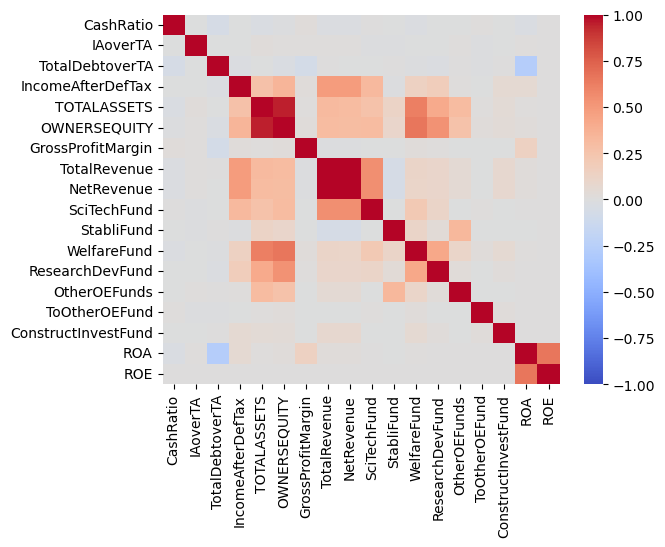

In [21]:
sns.heatmap(corrle,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()

In [22]:
regress_cols=['CashRatio','IAoverTA','TotalDebtoverTA','ResearchDevFund','ROA','ROE','GrossProfitMargin','TotalRevenue']
regression1=df[regress_cols]
regression1

,CashRatio,IAoverTA,TotalDebtoverTA,ResearchDevFund,ROA,ROE,GrossProfitMargin,TotalRevenue
13,0.29,0.00,0.02,9.598561e+10,0.107973,0.210010,0.1190,6.914857e+11
14,0.18,0.00,0.00,1.124009e+11,0.086233,0.173840,0.1092,7.285825e+11
15,0.34,0.00,0.00,1.250330e+11,0.065532,0.145182,0.1098,6.501481e+11
16,0.17,0.00,0.00,1.250330e+11,0.066977,0.170226,0.1298,7.192805e+11
21,0.09,0.00,0.40,2.580392e+09,0.000170,0.000340,0.2748,9.140000e+02
...,...,...,...,...,...,...,...,...
26624,0.08,0.00,0.45,2.049601e+10,0.018324,0.249297,0.1744,5.385858e+11
26625,0.21,0.00,0.37,2.276410e+10,0.020102,0.252424,0.1836,5.188880e+11
26626,0.03,0.00,0.23,2.276410e+10,-0.012067,-0.892563,0.0861,6.100434e+11
26627,0.02,0.01,0.28,0.000000e+00,0.013659,0.490421,0.0868,6.089154e+11


In [23]:
corrle1=regression1.corr()
corrle1

,CashRatio,IAoverTA,TotalDebtoverTA,ResearchDevFund,ROA,ROE,GrossProfitMargin,TotalRevenue
CashRatio,1.000000,-0.004552,-0.057483,-0.001207,-0.028770,0.002511,0.019597,-0.021280
IAoverTA,-0.004552,1.000000,-0.006020,-0.001519,0.008596,0.003143,0.012116,0.011740
TotalDebtoverTA,-0.057483,-0.006020,1.000000,-0.015673,-0.268527,0.003307,-0.073638,0.000115
ResearchDevFund,-0.001207,-0.001519,-0.015673,1.000000,0.005248,0.001868,0.012256,0.101015
ROA,-0.028770,0.008596,-0.268527,0.005248,1.000000,0.658386,0.144223,0.019139
ROE,0.002511,0.003143,0.003307,0.001868,0.658386,1.000000,0.005011,0.002805
GrossProfitMargin,0.019597,0.012116,-0.073638,0.012256,0.144223,0.005011,1.000000,-0.012995
TotalRevenue,-0.021280,0.011740,0.000115,0.101015,0.019139,0.002805,-0.012995,1.000000


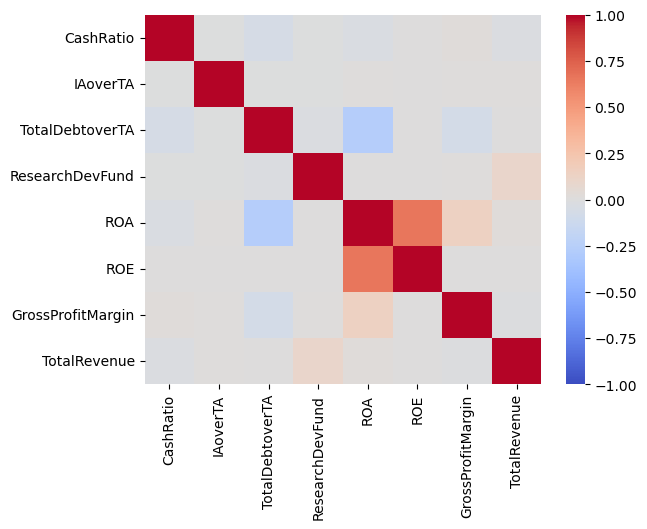

In [24]:
sns.heatmap(corrle1,vmin=-1,vmax=1, annot=False, fmt=".2f",cmap='coolwarm')
plt.show()

In [37]:
regression=regression1[['ROA','ROE','GrossProfitMargin','TotalDebtoverTA']]
import numpy as np

# Đếm số lượng giá trị vô cực trong từng cột của DataFrame df
infinite_values_per_column = np.isinf(regression).sum(axis=0)

print("Số lượng giá trị vô cực trong từng cột:")
print(infinite_values_per_column)



Số lượng giá trị vô cực trong từng cột:
ROA                  0
ROE                  3
GrossProfitMargin    0
TotalDebtoverTA      0
dtype: int64


In [38]:

# Xóa các hàng chứa giá trị vô cực từ DataFrame df
regression = regression.replace([np.inf, -np.inf], np.nan)  # Chuyển các giá trị vô cực thành NaN
regression = regression.dropna(axis=0)  # Loại bỏ các hàng chứa NaN

# Bạn cũng có thể chỉ định các cột cụ thể nếu muốn
# df_cleaned = df.dropna(axis=0, subset=['column1', 'column2'])

# Sử dụng df_cleaned để tiếp tục phân tích hoặc xây dựng mô hình

In [39]:
regression.dropna(inplace=True)
regression.isnull().sum()

ROA                  0
ROE                  0
GrossProfitMargin    0
TotalDebtoverTA      0
dtype: int64

In [28]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# scaler = StandardScaler()
# regression = scaler.fit_transform(regression)
# regression = pd.DataFrame(regression, columns=['ROA','TotalDebtoverTA'])  # Thay 'column_names' bằng tên cột thích hợp


In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Tạo DataFrame từ dữ liệu


# Scale dữ liệu
# Sử dụng StandardScaler
# regression = np.log(regression)
x=regression.drop('ROA',axis=1)
y=regression['ROA']
print(x.shape,y.shape)

# Check for infinite values
print("Infinite values in x:", np.any(np.isinf(x)))

# Check for missing values (NaNs)
print("Missing values (NaNs) in x:", np.any(np.isnan(x)))

# scaler = StandardScaler()
# Sử dụng MinMaxScaler
# scaler = MinMaxScaler()
scaler = RobustScaler()
x = scaler.fit_transform(x)
# x = pd.DataFrame(x, columns=['TotalDebtoverTA'])  # Thay 'column_names' bằng tên cột thích hợp

# Thêm cột hằng 1 vào DataFrame để tính intercept trong mô hình
# x = np.column_stack((x, np.ones(x.shape[0])))
# x_values = x.values
# y_values = y.values

# Phân tích hồi quy tuyến tính
model = sm.OLS(y, x)
results = model.fit()

# Tạo bảng thống kê tuyến tính
summary = results.summary()
print(summary)


(5367, 3) (5367,)
Infinite values in x: False
Missing values (NaNs) in x: False
                                 OLS Regression Results                                
Dep. Variable:                    ROA   R-squared (uncentered):                   0.520
Model:                            OLS   Adj. R-squared (uncentered):              0.519
Method:                 Least Squares   F-statistic:                              1935.
Date:                Sat, 04 May 2024   Prob (F-statistic):                        0.00
Time:                        20:01:54   Log-Likelihood:                         -1245.4
No. Observations:                5367   AIC:                                      2497.
Df Residuals:                    5364   BIC:                                      2516.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err        

In [30]:
y

13       0.107973
14       0.086233
15       0.065532
16       0.066977
21       0.000170
           ...   
26624    0.018324
26625    0.020102
26626   -0.012067
26627    0.013659
26628    0.034642
Name: ROA, Length: 5370, dtype: float64

In [31]:
import pandas as pd
import statsmodels.api as sm

    # Tạo DataFrame từ dữ liệu
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 5, 4, 6],
}
df = pd.DataFrame(data)

# Thêm cột hằng 1 vào DataFrame để tính intercept trong mô hình
df['intercept'] = 1

# Phân tích hồi quy tuyến tính
model = sm.OLS(df['Y'], df[['X', 'intercept']])
results = model.fit()

# Tạo bảng thống kê tuyến tính
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     12.79
Date:                Sat, 04 May 2024   Prob (F-statistic):             0.0374
Time:                        19:59:26   Log-Likelihood:                -4.6757
No. Observations:                   5   AIC:                             13.35
Df Residuals:                       3   BIC:                             12.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.9000      0.252      3.576      0.0

c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.



In [ ]:
import pandas as pd
import statsmodels.api as sm

    # Tạo DataFrame từ dữ liệu
data = {
    'X': [1, 2, 3, 4, 5],
    'Y': [2, 3, 5, 4, 6],
}
df = pd.DataFrame(data)

# Thêm cột hằng 1 vào DataFrame để tính intercept trong mô hình
df['intercept'] = 1

# Phân tích hồi quy tuyến tính
model = sm.OLS(df['Y'], df[['X', 'intercept']])
results = model.fit()

# Tạo bảng thống kê tuyến tính
summary = results.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     12.79
Date:                Sat, 04 May 2024   Prob (F-statistic):             0.0374
Time:                        19:59:26   Log-Likelihood:                -4.6757
No. Observations:                   5   AIC:                             13.35
Df Residuals:                       3   BIC:                             12.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.9000      0.252      3.576      0.0

c:\Users\PC\miniconda3\envs\uii_prj\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 5 samples were given.

